In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import universal as up
from universal import tools, algos
from universal.algos import *

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
from ml import *
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
# ignore logged warnings
import logging
logging.getLogger().setLevel(logging.ERROR)

In [4]:

result = pd.DataFrame()
returnmatrix = pd.DataFrame()
pricematrix = pd.DataFrame()
returnrankmatrix = pd.DataFrame()
featurematrix = pd.DataFrame()

startingdate = '2020-05-01'
enddate = '2023-11-30'

coinNames = ['link', 'bnb', 'eos', 'etc', 'bch', 'trx', 'ada', 'xrp', 'btc', 'eth']
for item in coinNames:
    filename = 'data/' + item + '-usd-max.csv'
    df = pd.read_csv(filename, header=0)
    #print(df.describe())
    dfshort = df.loc[df['snapped_at'] > startingdate, ]
    #print(dfshort.describe())
    #print(item)
    #print(dfshort['price'])
    result[item + '_price'] = np.array(dfshort['price']) / np.array(dfshort['price'])[0]
    pricematrix[item ] = np.array(dfshort['price']) / np.array(dfshort['price'])[0]
    priceseries = np.array(dfshort['price'])
    pricediff = np.concatenate([np.diff(priceseries), [0]])
    returnmatrix[item + '_return'] = np.divide(pricediff, priceseries)
    result[item + '_total_volume'] = np.array(dfshort['total_volume'])
print(pricematrix)
result = pricematrix

          link        bnb       eos       etc       bch       trx       ada  \
0     1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.015720   1.027732  1.015949  1.030320  1.021732  1.037088  1.042878   
2     1.030904   1.031729  1.039515  1.159153  1.047763  1.071460  1.061150   
3     1.003367   1.006717  1.004554  1.119044  1.011043  1.052227  1.033589   
4     1.011326   1.002260  0.982628  1.119393  0.988371  1.065290  1.027541   
...        ...        ...       ...       ...       ...       ...       ...   
1304  3.979382  13.794338  0.247856  3.018289  0.913351  7.130348  8.218967   
1305  3.994039  13.666614  0.248067  2.969610  0.910918  7.072672  8.079283   
1306  3.843028  13.381329  0.239692  2.887291  0.897647  6.702539  7.881852   
1307  3.918762  13.516827  0.239788  2.924891  0.895702  6.749037  8.028897   
1308  3.914251  13.379546  0.240295  2.904944  0.895545  6.783954  7.943287   

           xrp       btc        eth  
0     1.00000

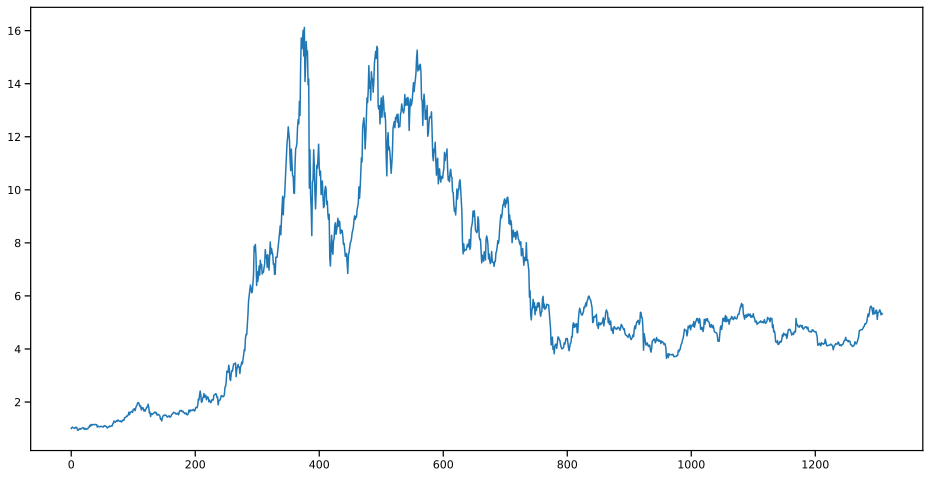

In [19]:
# 1/N portfolio
plt.plot(pricematrix.mean(axis=1))

In [14]:
#list all the algos
olps_algos = [
algos.Anticor(),
algos.BAH(),
algos.BCRP(),
algos.BNN(),
algos.CORN(),
algos.CRP(),  
# algos.CWMR(),
algos.EG(),
# algos.Kelly(),
algos.OLMAR(),
# algos.ONS(),
algos.PAMR(),
algos.RMR(),
# algos.UP()
]
train = pricematrix
# put all the algos in a dataframe
algo_names = [a.__class__.__name__ for a in olps_algos]
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'MaxDrawdown'] = r.max_drawdown
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
print(olps_train)

Anticor
BAH
BCRP
BNN
CORN
CRP
EG
OLMAR
PAMR
RMR
                                                      algo  \
Anticor  <universal.algos.anticor.Anticor object at 0x0...   
BAH      <universal.algos.bah.BAH object at 0x000001EF8...   
BCRP     <universal.algos.bcrp.BCRP object at 0x000001E...   
BNN      <universal.algos.bnn.BNN object at 0x000001EF8...   
CORN     <universal.algos.corn.CORN object at 0x000001E...   
CRP      <universal.algos.crp.CRP object at 0x000001EF8...   
EG       <universal.algos.eg.EG object at 0x000001EF890...   
OLMAR    <universal.algos.olmar.OLMAR object at 0x00000...   
PAMR     <universal.algos.pamr.PAMR object at 0x000001E...   
RMR      <universal.algos.rmr.RMR object at 0x000001EF8...   

                                                   results    profit  \
Anticor  <universal.result.AlgoResult object at 0x00000...  0.997383   
BAH      <universal.result.AlgoResult object at 0x00000...  1.095133   
BCRP     <universal.result.AlgoResult object at 0x000

In [5]:
samplereturnmatrix = pd.DataFrame()
samplereturnmatrix['return'] = returnmatrix.loc[100, ]
samplereturnmatrix['returnRank'] = pd.DataFrame(returnmatrix.loc[100, ]).rank(0)
samplereturnmatrix['returnRank^2'] = pow(samplereturnmatrix['returnRank'], 2)
samplereturnmatrix

return  returnRank  returnRank^2
link_return  0.086278        10.0         100.0
bnb_return  -0.019612         2.0           4.0
eos_return  -0.007555         4.0          16.0
etc_return  -0.002543         8.0          64.0
bch_return  -0.015088         3.0           9.0
trx_return   0.003609         9.0          81.0
ada_return  -0.005624         5.0          25.0
xrp_return  -0.020843         1.0           1.0
btc_return  -0.004794         6.0          36.0
eth_return  -0.004740         7.0          49.0

In [6]:
returnmatrix.describe().to_csv('returnstat.csv')

In [7]:
xindex = list()
for item in dfshort['snapped_at']:
    xindex.append( item.split(' ')[0])
    # print(item)


<Axes: xlabel='Time', ylabel='Price'>

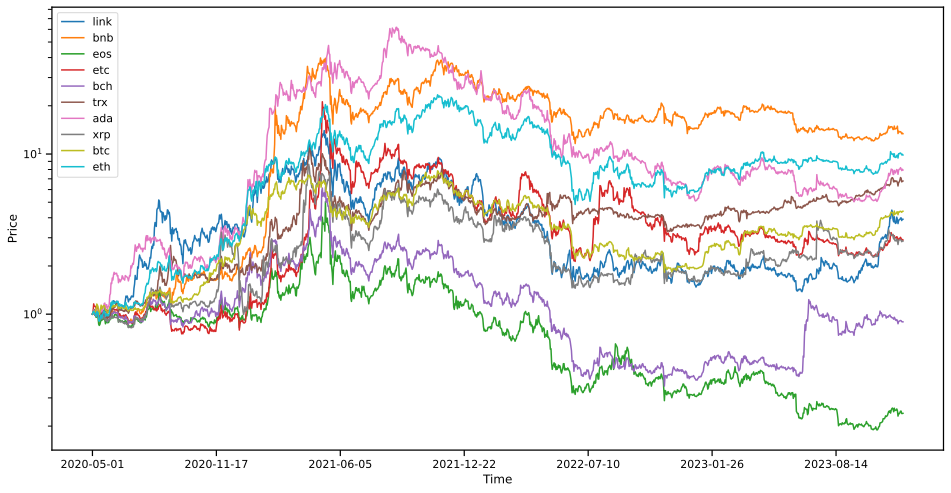

In [8]:
# print(dfshort['snapped_at'])
pricematrixwithdata = pricematrix.copy(deep=True)
pricematrixwithdata.index = xindex
pricematrixwithdata.plot(logy=True, xlabel = 'Time', ylabel = 'Price' )

In [9]:

# mlp rf xgb knn
mr = ML(n=100, model ='xgb')
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

KeyboardInterrupt: 

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.85 ± 0.51
    Ulcer index: 1.03
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): 0.02 ± 0.44
    Beta / Alpha: 0.99 / 0.303%
    Annualized return: 55.90%
    Annualized volatility: 65.77%
    Longest drawdown: 932 days
    Max drawdown: 79.40%
    Winning days: 54.1%
    Annual turnover: 144.7
        
0       1.000000
1       1.026879
2       1.056952
3       1.031484
4       1.025873
          ...   
1304    6.044269
1305    5.998038
1306    5.809233
1307    5.883917
1308    5.853084
Length: 1309, dtype: float64


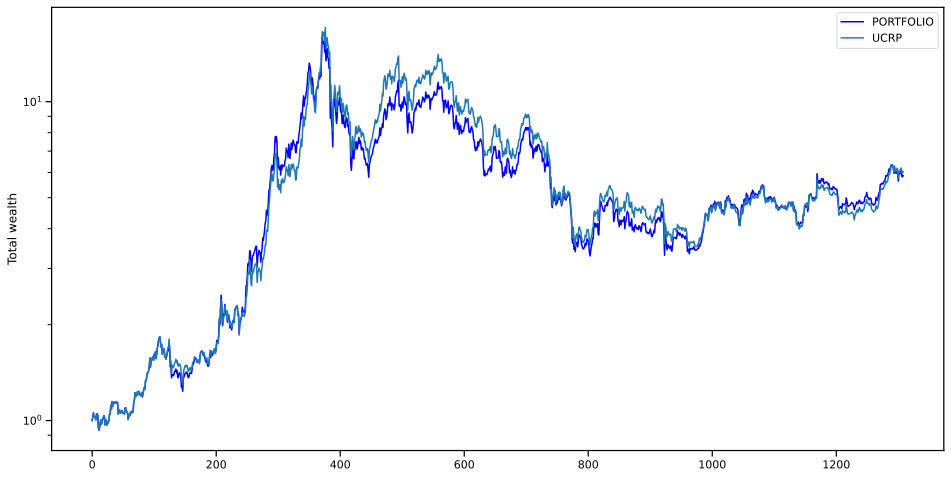

In [ ]:
from ml import *
import warnings 
warnings.filterwarnings('ignore') 
# mlp rf xgb knn
mr = ML(n=100, model ='xgb', targettype=1)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.08
    Sharpe ratio: 0.73 ± 0.49
    Ulcer index: 0.92
    Information ratio (wrt benchmark): -0.40
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): -0.30 ± 0.44
    Beta / Alpha: 0.97 / -6.048%
    Annualized return: 48.00%
    Annualized volatility: 65.74%
    Longest drawdown: 932 days
    Max drawdown: 79.33%
    Winning days: 54.8%
    Annual turnover: 160.8
        
0       1.000000
1       1.026879
2       1.056952
3       1.031484
4       1.025873
          ...   
1304    4.049569
1305    4.010415
1306    3.859497
1307    3.880471
1308    3.885055
Length: 1309, dtype: float64


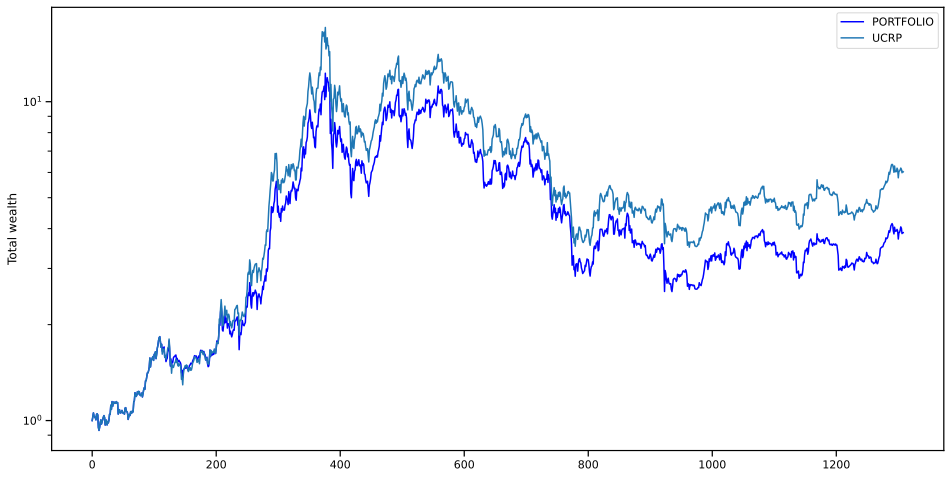

In [ ]:
from ml import *
# import warnings 
# warnings.filterwarnings('ignore') 
# mlp rf xgb knn

mr = ML(n=100, model ='mlp', targettype=0, predicttype=0, updateFrequency=10)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.88 ± 0.52
    Ulcer index: 1.02
    Information ratio (wrt benchmark): -0.02
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): 0.16 ± 0.44
    Beta / Alpha: 0.96 / 2.131%
    Annualized return: 55.59%
    Annualized volatility: 63.40%
    Longest drawdown: 932 days
    Max drawdown: 79.78%
    Winning days: 55.1%
    Annual turnover: 115.5
        
0       1.000000
1       1.026879
2       1.056952
3       1.031484
4       1.025873
          ...   
1304    6.357428
1305    6.307327
1306    6.147541
1307    6.225966
1308    6.208749
Length: 1309, dtype: float64


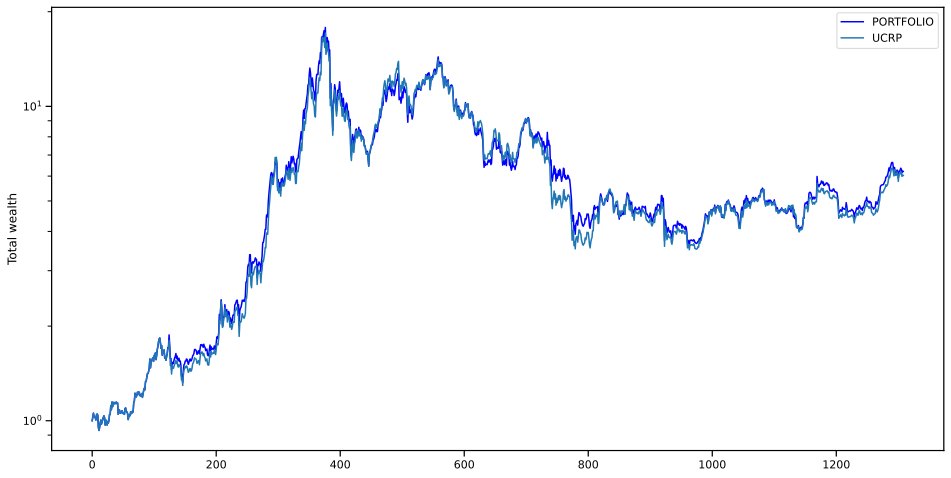

In [ ]:
from ml import *
# import warnings 
# warnings.filterwarnings('ignore') 
# mlp rf xgb knn

mr = ML(n=100, model ='mlp', targettype=1)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.13
    Sharpe ratio: 0.98 ± 0.53
    Ulcer index: 1.22
    Information ratio (wrt benchmark): 0.42
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): 0.63 ± 0.44
    Beta / Alpha: 0.95 / 8.749%
    Annualized return: 61.83%
    Annualized volatility: 63.10%
    Longest drawdown: 937 days
    Max drawdown: 77.74%
    Winning days: 55.2%
    Annual turnover: 70.8
        
0       1.000000
1       1.026879
2       1.056952
3       1.031484
4       1.025873
          ...   
1304    8.868333
1305    8.820814
1306    8.571746
1307    8.670848
1308    8.664668
Length: 1309, dtype: float64


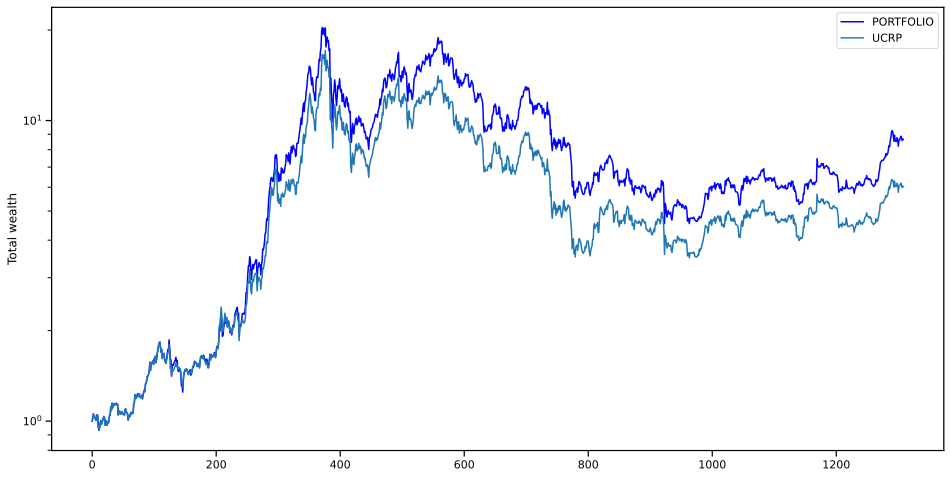

In [ ]:
from ml import *
# import warnings 
# warnings.filterwarnings('ignore') 
# mlp rf xgb knn

mr = ML(n=100, model ='mlp', targettype=2)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='rf', targettype=0),
    ML(n=100, model ='rf', targettype=1),
    ML(n=100, model ='rf', targettype=2),
    ML(n=100, model ='rf', targettype=3),
    ML(n=100, model ='rf', targettype=4),
    
    ML(n=100, model ='knn', targettype=0),
    ML(n=100, model ='knn', targettype=1),
    ML(n=100, model ='knn', targettype=2),
    ML(n=100, model ='knn', targettype=3),
    ML(n=100, model ='knn', targettype=4),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult = olps_train

In [ ]:
print(mlresult)

                               algo  \
0  <ml.ML object at 0x7ff6a05de790>   
1  <ml.ML object at 0x7ff6a05de7f0>   
2  <ml.ML object at 0x7ff6a05de310>   
3  <ml.ML object at 0x7ff6a05de550>   
4  <ml.ML object at 0x7ff6a05de3d0>   
5  <ml.ML object at 0x7ff6a05de2e0>   
6  <ml.ML object at 0x7ff6a05de370>   
7  <ml.ML object at 0x7ff6a05dea60>   
8  <ml.ML object at 0x7ff6a05de400>   
9  <ml.ML object at 0x7ff6a05debb0>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7ff6a...  1.100179   0.85336   
1  <universal.result.AlgoResult object at 0x7ff6a...  1.099722  0.841531   
2  <universal.result.AlgoResult object at 0x7ff6a...  1.092522   0.80958   
3  <universal.result.AlgoResult object at 0x7ff6a...  1.081892  0.758197   
4  <universal.result.AlgoResult object at 0x7ff6a...  1.090587  0.804507   
5  <universal.result.AlgoResult object at 0x7ff6a...    1.0887  0.798736   
6  <universal.result.AlgoResult object

In [ ]:
r.annualized_volatility

0.6436738877256978

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='mlp', targettype=0),
    ML(n=100, model ='mlp', targettype=1),
    ML(n=100, model ='mlp', targettype=2),
    ML(n=100, model ='mlp', targettype=3),
    ML(n=100, model ='mlp', targettype=4),
    
    ML(n=100, model ='xgb', targettype=0),
    ML(n=100, model ='xgb', targettype=1),
    ML(n=100, model ='xgb', targettype=2),
    ML(n=100, model ='xgb', targettype=3),
    ML(n=100, model ='xgb', targettype=4),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult2 = olps_train
print(mlresult2)

0


KeyboardInterrupt: 

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='mlp', targettype=0, predicttype=1),
    ML(n=100, model ='mlp', targettype=1, predicttype=1),
    ML(n=100, model ='mlp', targettype=2, predicttype=1),
    ML(n=100, model ='mlp', targettype=3, predicttype=1),
    ML(n=100, model ='mlp', targettype=4, predicttype=1),
    
    ML(n=100, model ='xgb', targettype=0, predicttype=1),
    ML(n=100, model ='xgb', targettype=1, predicttype=1),
    ML(n=100, model ='xgb', targettype=2, predicttype=1),
    ML(n=100, model ='xgb', targettype=3, predicttype=1),
    ML(n=100, model ='xgb', targettype=4, predicttype=1),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult3 = olps_train
print(mlresult3)

0
1
2
3
4
5
6
8
9
                               algo  \
0  <ml.ML object at 0x7ff6a034b880>   
1  <ml.ML object at 0x7ff6a034b640>   
2  <ml.ML object at 0x7ff6a034b430>   
3  <ml.ML object at 0x7ff6a034b850>   
4  <ml.ML object at 0x7ff6a034b310>   
5  <ml.ML object at 0x7ff6a034b580>   
6  <ml.ML object at 0x7ff6a034b760>   
7  <ml.ML object at 0x7ff6a034b730>   
8  <ml.ML object at 0x7ff6a034bd30>   
9  <ml.ML object at 0x7ff6a034b9d0>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7ff6a...  1.100909  0.852046   
1  <universal.result.AlgoResult object at 0x7ff6a...  1.109265  0.894617   
2  <universal.result.AlgoResult object at 0x7ff6a...  1.120949  0.952746   
3  <universal.result.AlgoResult object at 0x7ff6a...  1.106153  0.877274   
4  <universal.result.AlgoResult object at 0x7ff6a...  1.098653  0.840051   
5  <universal.result.AlgoResult object at 0x7ff6a...  1.111927  0.912109   
6  <universal.result

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='rf', targettype=0, predicttype=1),
    ML(n=100, model ='rf', targettype=1, predicttype=1),
    ML(n=100, model ='rf', targettype=2, predicttype=1),
    ML(n=100, model ='rf', targettype=3, predicttype=1),
    ML(n=100, model ='rf', targettype=4, predicttype=1),
    
    ML(n=100, model ='knn', targettype=0, predicttype=1),
    ML(n=100, model ='knn', targettype=1, predicttype=1),
    ML(n=100, model ='knn', targettype=2, predicttype=1),
    ML(n=100, model ='knn', targettype=3, predicttype=1),
    ML(n=100, model ='knn', targettype=4, predicttype=1),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult4 = olps_train
print(mlresult4)

0
1
2
3
4
5
6
7
8
9
                               algo  \
0  <ml.ML object at 0x7ff6a02d3280>   
1  <ml.ML object at 0x7ff6a02d3bb0>   
2  <ml.ML object at 0x7ff6a02d3c40>   
3  <ml.ML object at 0x7ff6a02d36d0>   
4  <ml.ML object at 0x7ff6a02d3cd0>   
5  <ml.ML object at 0x7ff6a02d34c0>   
6  <ml.ML object at 0x7ff6a02d3340>   
7  <ml.ML object at 0x7ff6a02d3c10>   
8  <ml.ML object at 0x7ff6a02d3700>   
9  <ml.ML object at 0x7ff6a02d3eb0>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7ff6a...  1.103813  0.871966   
1  <universal.result.AlgoResult object at 0x7ff6a...  1.104212  0.868119   
2  <universal.result.AlgoResult object at 0x7ff6a...  1.099457  0.845919   
3  <universal.result.AlgoResult object at 0x7ff6a...  1.093206  0.815859   
4  <universal.result.AlgoResult object at 0x7ff6a...  1.099863  0.850745   
5  <universal.result.AlgoResult object at 0x7ff6a...  1.099492   0.85005   
6  <universal.resu

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='rf', targettype=0, predicttype=1, updateFrequency=10),
    ML(n=100, model ='rf', targettype=1, predicttype=1, updateFrequency=10),
    ML(n=100, model ='rf', targettype=2, predicttype=1, updateFrequency=10),
    ML(n=100, model ='rf', targettype=3, predicttype=1, updateFrequency=10),
    ML(n=100, model ='rf', targettype=4, predicttype=1, updateFrequency=10),
    
    ML(n=100, model ='knn', targettype=0, predicttype=1, updateFrequency=10),
    ML(n=100, model ='knn', targettype=1, predicttype=1, updateFrequency=10),
    ML(n=100, model ='knn', targettype=2, predicttype=1, updateFrequency=10),
    ML(n=100, model ='knn', targettype=3, predicttype=1, updateFrequency=10),
    ML(n=100, model ='knn', targettype=4, predicttype=1, updateFrequency=10),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    # olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'MaxDrawdown'] = r.max_drawdown
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult4_10 = olps_train
print(mlresult4_10)

0
1
2
3
4
5
6
7
8
9
                               algo  \
0  <ml.ML object at 0x7fcec9f0bb80>   
1  <ml.ML object at 0x7fcec9f0b2e0>   
2  <ml.ML object at 0x7fcec9f0bbb0>   
3  <ml.ML object at 0x7fcec9f0bbe0>   
4  <ml.ML object at 0x7fcec9f0bc10>   
5  <ml.ML object at 0x7fcec9f0bc40>   
6  <ml.ML object at 0x7fcec9f0bc70>   
7  <ml.ML object at 0x7fcec9f0bca0>   
8  <ml.ML object at 0x7fcec9f0bcd0>   
9  <ml.ML object at 0x7fcec9f0bd00>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7fcec...  1.110069  0.905879   
1  <universal.result.AlgoResult object at 0x7fcec...  1.114405  0.920403   
2  <universal.result.AlgoResult object at 0x7fcec...  1.106438  0.882652   
3  <universal.result.AlgoResult object at 0x7fcec...  1.110259  0.903134   
4  <universal.result.AlgoResult object at 0x7fcec...  1.102058  0.862841   
5  <universal.result.AlgoResult object at 0x7fcec...  1.107415  0.892572   
6  <universal.resu

In [ ]:
mlresult4_10.to_csv('mlresult4_10.csv')

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='mlp', targettype=0, predicttype=1, updateFrequency=10),
    ML(n=100, model ='mlp', targettype=1, predicttype=1, updateFrequency=10),
    ML(n=100, model ='mlp', targettype=2, predicttype=1, updateFrequency=10),
    ML(n=100, model ='mlp', targettype=3, predicttype=1, updateFrequency=10),
    ML(n=100, model ='mlp', targettype=4, predicttype=1, updateFrequency=10),
    
    ML(n=100, model ='xgb', targettype=0, predicttype=1, updateFrequency=10),
    ML(n=100, model ='xgb', targettype=1, predicttype=1, updateFrequency=10),
    ML(n=100, model ='xgb', targettype=2, predicttype=1, updateFrequency=10),
    ML(n=100, model ='xgb', targettype=3, predicttype=1, updateFrequency=10),
    ML(n=100, model ='xgb', targettype=4, predicttype=1, updateFrequency=10),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'MaxDrawdown','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'MaxDrawdown'] = r.max_drawdown
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult5 = olps_train
print(mlresult5)

0
1
2
3
4
5
6
7
8
9
                               algo  \
0  <ml.ML object at 0x7fceca72af40>   
1  <ml.ML object at 0x7fceca72af70>   
2  <ml.ML object at 0x7fceca72afa0>   
3  <ml.ML object at 0x7fceca72afd0>   
4  <ml.ML object at 0x7fceca72ad30>   
5  <ml.ML object at 0x7fcf1c486e80>   
6  <ml.ML object at 0x7fcf1c486610>   
7  <ml.ML object at 0x7fcf1c486580>   
8  <ml.ML object at 0x7fcf1c486820>   
9  <ml.ML object at 0x7fcf1c486190>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7fcec...  1.104462  0.869934   
1  <universal.result.AlgoResult object at 0x7fcec...  1.110656  0.903468   
2  <universal.result.AlgoResult object at 0x7fcec...  1.132737  1.010642   
3  <universal.result.AlgoResult object at 0x7fcec...  1.112654  0.910749   
4  <universal.result.AlgoResult object at 0x7fcec...  1.103886  0.866235   
5  <universal.result.AlgoResult object at 0x7fcec...  1.103914  0.873974   
6  <universal.resu

In [ ]:
feearray = [0.000, 0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015]
feetestMatrix = pd.DataFrame(index = np.arange(len(feearray)))
for i in range(len(feearray)):
    mlresult5.loc[2, 'results'].fee = feearray[i]
    r = mlresult5.loc[2, 'results']
    feetestMatrix.loc[i,'profit'] = r.profit_factor
    feetestMatrix.loc[i,'sharpe'] = r.sharpe
    feetestMatrix.loc[i,'information'] = r.information
    feetestMatrix.loc[i,'annualized_return'] = r.annualized_return * 100
    feetestMatrix.loc[i,'annualized_volatility'] = r.annualized_volatility * 100
    feetestMatrix.loc[i,'MaxDrawdown'] = r.max_drawdown
    feetestMatrix.loc[i,'winning_pct'] = r.winning_pct * 100
print(feetestMatrix)
feetestMatrix.to_csv('feetestMatrix.csv')

     profit    sharpe  information  annualized_return  annualized_volatility  \
0  1.132737  1.010642     0.944938          64.261267              63.584588   
1  1.128861  0.991694     0.809029          63.058764              63.586888   
2  1.124997  0.972747     0.673124          61.856262              63.589255   
3  1.121147  0.953800     0.537248          60.653760              63.591690   
4  1.117309  0.934854     0.401422          59.451257              63.594193   
5  1.113485  0.915908     0.265667          58.248755              63.596762   
6  1.109673  0.896962     0.130008          57.046252              63.599399   

   MaxDrawdown  winning_pct  
0     0.773982    55.045872  
1     0.780363    55.045872  
2     0.787118    54.969419  
3     0.793665    54.969419  
4     0.800011    54.969419  
5     0.806162    54.969419  
6     0.812125    54.816514  


In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='svr', targettype=0, predicttype=1, updateFrequency=10),
    ML(n=100, model ='svr', targettype=1, predicttype=1, updateFrequency=10),
    ML(n=100, model ='svr', targettype=2, predicttype=1, updateFrequency=10),
    ML(n=100, model ='svr', targettype=3, predicttype=1, updateFrequency=10),
    ML(n=100, model ='svr', targettype=4, predicttype=1, updateFrequency=10),
     
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'MaxDrawdown','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'MaxDrawdown'] = r.max_drawdown
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult5_svr = olps_train
print(mlresult5_svr)

0
1
2
3
4
                               algo  \
0  <ml.ML object at 0x7fceca91bc70>   
1  <ml.ML object at 0x7fceca91bf70>   
2  <ml.ML object at 0x7fceca91bee0>   
3  <ml.ML object at 0x7fceca91b340>   
4  <ml.ML object at 0x7fceca91b2b0>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7fcec...  1.095888  0.841119   
1  <universal.result.AlgoResult object at 0x7fcec...  1.131341  0.998922   
2  <universal.result.AlgoResult object at 0x7fcec...  1.137875  1.028824   
3  <universal.result.AlgoResult object at 0x7fcec...  1.137442  1.026759   
4  <universal.result.AlgoResult object at 0x7fcec...  1.137442  1.026759   

  information annualized_return MaxDrawdown winning_pct  annualized_volatility  
0      0.0223         56.092375    0.819154   54.663609              66.687810  
1    0.854155         63.435502    0.765413   54.969419              63.503985  
2    1.151035         65.422317    0.756471   55.122324

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='et', targettype=0, predicttype=1, updateFrequency=10),
    ML(n=100, model ='et', targettype=1, predicttype=1, updateFrequency=10),
    ML(n=100, model ='et', targettype=2, predicttype=1, updateFrequency=10),
    ML(n=100, model ='et', targettype=3, predicttype=1, updateFrequency=10),
    ML(n=100, model ='et', targettype=4, predicttype=1, updateFrequency=10),
     
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'MaxDrawdown','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'MaxDrawdown'] = r.max_drawdown
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult5_et = olps_train
print(mlresult5_et)

0
1
2
3
4
                               algo  \
0  <ml.ML object at 0x7fcec5eb3700>   
1  <ml.ML object at 0x7fcec5eb3100>   
2  <ml.ML object at 0x7fcec5eb3e50>   
3  <ml.ML object at 0x7fcec5eb34f0>   
4  <ml.ML object at 0x7fcec5eb37c0>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7fcec...   1.10449  0.877261   
1  <universal.result.AlgoResult object at 0x7fcec...  1.105754  0.876415   
2  <universal.result.AlgoResult object at 0x7fcec...  1.109011   0.89524   
3  <universal.result.AlgoResult object at 0x7fcec...  1.106368  0.884078   
4  <universal.result.AlgoResult object at 0x7fcec...  1.102952  0.866476   

  information annualized_return MaxDrawdown winning_pct  annualized_volatility  
0    0.174133         57.513007    0.812706   54.969419              65.559746  
1    0.034412         56.242116    0.807133   55.198777              64.172946  
2    0.201292         57.802728    0.805637   54.969419

0.8046447022466237

Summary:
    Profit factor: 1.13
    Sharpe ratio: 1.01 ± 0.54
    Ulcer index: 1.27
    Information ratio (wrt benchmark): 0.94
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): 1.14 ± 0.44
    Beta / Alpha: 0.97 / 9.961%
    Annualized return: 64.26%
    Annualized volatility: 63.58%
    Longest drawdown: 932 days
    Max drawdown: 77.40%
    Winning days: 55.0%
    Annual turnover: 48.1
        


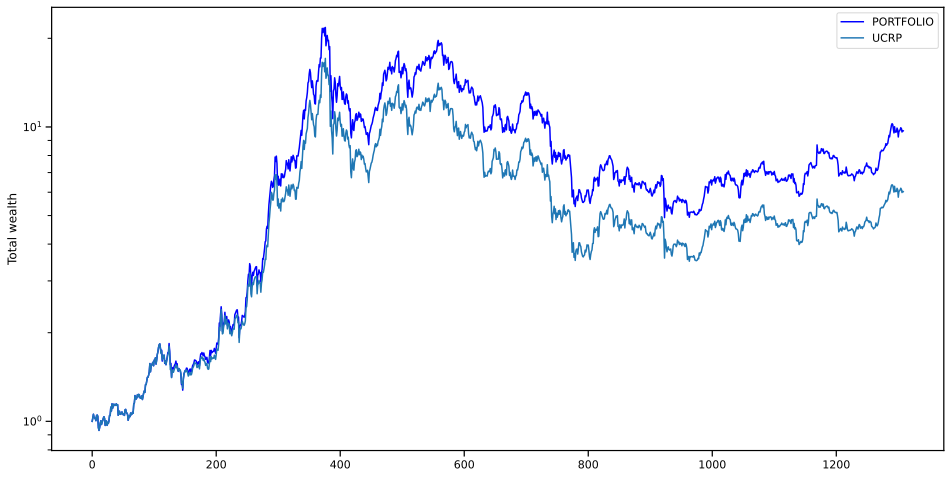

In [ ]:

print(mlresult5.loc[2, 'results'].summary())
mlresult5.loc[2, 'results'].plot(assets=False, logy=True, weights=False, ucrp=True);
mlresult5.to_csv('mlresult5.csv')

In [ ]:
#list all the algos
olps_algos = [
    ML(n=100, model ='mlp', targettype=0, predicttype=1, updateFrequency=5),
    ML(n=100, model ='mlp', targettype=1, predicttype=1, updateFrequency=5),
    ML(n=100, model ='mlp', targettype=2, predicttype=1, updateFrequency=5),
    ML(n=100, model ='mlp', targettype=3, predicttype=1, updateFrequency=5),
    ML(n=100, model ='mlp', targettype=4, predicttype=1, updateFrequency=5),
    
    ML(n=100, model ='xgb', targettype=0, predicttype=1, updateFrequency=5),
    ML(n=100, model ='xgb', targettype=1, predicttype=1, updateFrequency=5),
    ML(n=100, model ='xgb', targettype=2, predicttype=1, updateFrequency=5),
    ML(n=100, model ='xgb', targettype=3, predicttype=1, updateFrequency=5),
    ML(n=100, model ='xgb', targettype=4, predicttype=1, updateFrequency=5),
]
train = pricematrix
# put all the algos in a dataframe
algo_names = np.arange(len(olps_algos))
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    print(name)
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
mlresult6 = olps_train
print(mlresult6)

0
1
2
3
4
5
7
8
9
                               algo  \
0  <ml.ML object at 0x7ff6a0ea9d90>   
1  <ml.ML object at 0x7ff6a0ea97f0>   
2  <ml.ML object at 0x7ff6a0ea9eb0>   
3  <ml.ML object at 0x7ff6a0ea9b80>   
4  <ml.ML object at 0x7ff6a0ea98b0>   
5  <ml.ML object at 0x7ff6a0ea9310>   
6  <ml.ML object at 0x7ff6a0ea9670>   
7  <ml.ML object at 0x7ff6a0ea92b0>   
8  <ml.ML object at 0x7ff6a0ea93a0>   
9  <ml.ML object at 0x7ff6a0ea9400>   

                                             results    profit    sharpe  \
0  <universal.result.AlgoResult object at 0x7ff6a...  1.113418   0.91309   
1  <universal.result.AlgoResult object at 0x7ff6a...  1.102363  0.861058   
2  <universal.result.AlgoResult object at 0x7ff6a...  1.132486  1.009722   
3  <universal.result.AlgoResult object at 0x7ff6a...  1.108738  0.891099   
4  <universal.result.AlgoResult object at 0x7ff6a...  1.104118  0.866584   
5  <universal.result.AlgoResult object at 0x7ff6a...   1.10995  0.904295   
6  <universal.result

In [ ]:
mlresult6

NameError: name 'mlresult6' is not defined

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.86 ± 0.51
    Ulcer index: 0.99
    Information ratio (wrt benchmark): -0.37
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): 0.03 ± 0.45
    Beta / Alpha: 0.94 / 0.215%
    Annualized return: 52.60%
    Annualized volatility: 61.27%
    Longest drawdown: 932 days
    Max drawdown: 79.31%
    Winning days: 54.8%
    Annual turnover: 18.0
        
0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1304    5.864216
1305    5.817636
1306    5.677616
1307    5.732284
1308    5.712761
Length: 1309, dtype: float64


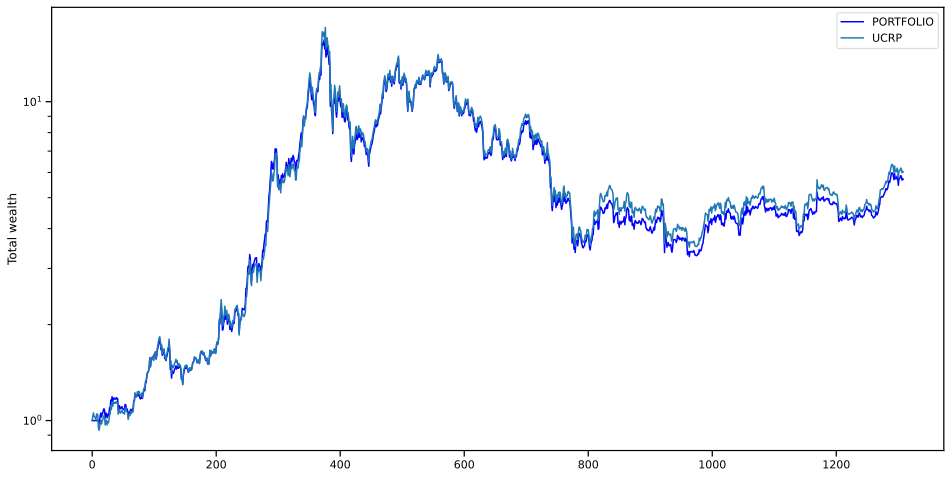

In [ ]:
from inversesd import *

mr = InverseSD(n=10 )
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.89 ± 0.52
    Ulcer index: 1.11
    Information ratio (wrt benchmark): 0.47
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): 0.22 ± 0.45
    Beta / Alpha: 1.05 / 2.388%
    Annualized return: 61.25%
    Annualized volatility: 69.15%
    Longest drawdown: 932 days
    Max drawdown: 80.42%
    Winning days: 54.5%
    Annual turnover: 17.0
        
0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1304    7.050724
1305    6.999221
1306    6.812075
1307    6.885578
1308    6.860139
Length: 1309, dtype: float64


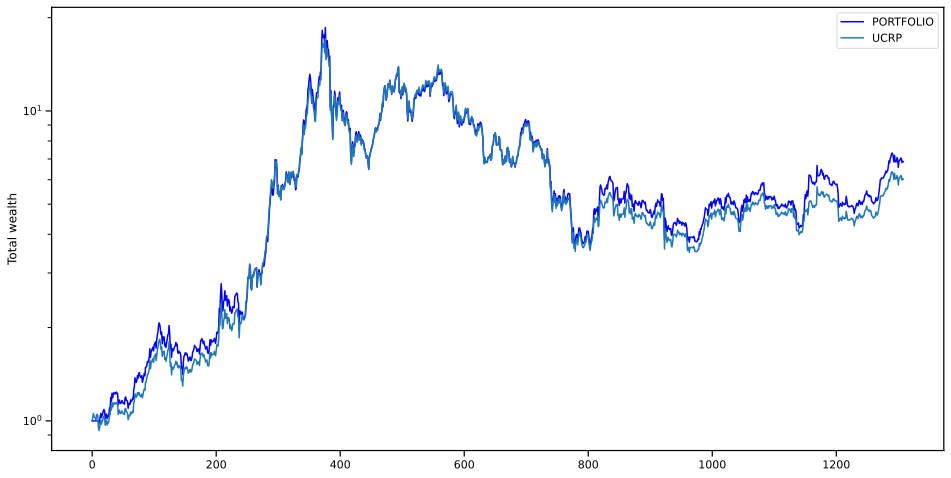

In [ ]:
from propotionalsd import *

mr = proportionalSD(n=10)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

In [ ]:
np.mean(pricematrix.iloc[-1,:])


2.432557874316314

In [ ]:
#list all the algos
olps_algos = [
algos.Anticor(),
algos.BAH(),
algos.BCRP(),
algos.BNN(),
algos.CORN(),
algos.CRP(),  
algos.CWMR(),
algos.EG(),
# algos.Kelly(),
algos.OLMAR(),
algos.ONS(),
algos.PAMR(),
algos.RMR(),
algos.UP()
]
train = pricematrix
# put all the algos in a dataframe
algo_names = [a.__class__.__name__ for a in olps_algos]
algo_data = ['algo', 'results', 'profit', 'sharpe', 'information', 'annualized_return', 'drawdown_period','winning_pct']
metrics = algo_data[2:]
olps_train = pd.DataFrame(index=algo_names, columns=algo_data)
olps_train.algo = olps_algos
# run all algos - this takes more than a minute
for name, alg in zip(olps_train.index, olps_train.algo):
    r =  alg.run(train)
    olps_train.loc[name,'results'] = r
    olps_train.loc[name,'profit'] = r.profit_factor
    olps_train.loc[name,'sharpe'] = r.sharpe
    olps_train.loc[name,'information'] = r.information
    olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
    olps_train.loc[name,'annualized_volatility'] = r.annualized_volatility * 100
    olps_train.loc[name,'drawdown_period'] = r.drawdown_period
    olps_train.loc[name,'MaxDrawdown'] = r.max_drawdown
    olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
    
print(olps_train)

                                                      algo  \
Anticor  <universal.algos.anticor.Anticor object at 0x7...   
BAH      <universal.algos.bah.BAH object at 0x7fcec9f57...   
BCRP     <universal.algos.bcrp.BCRP object at 0x7fcec9f...   
BNN      <universal.algos.bnn.BNN object at 0x7fcec9f57...   
CORN     <universal.algos.corn.CORN object at 0x7fcec5e...   
CRP      <universal.algos.crp.CRP object at 0x7fcec5e64...   
CWMR     <universal.algos.cwmr.CWMR object at 0x7fcec5e...   
EG        <universal.algos.eg.EG object at 0x7fcec5e645b0>   
OLMAR    <universal.algos.olmar.OLMAR object at 0x7fcec...   
ONS      <universal.algos.ons.ONS object at 0x7fcec5eba...   
PAMR     <universal.algos.pamr.PAMR object at 0x7fcec5e...   
RMR      <universal.algos.rmr.RMR object at 0x7fcec5eba...   
UP        <universal.algos.up.UP object at 0x7fcec9f0b1c0>   

                                                   results    profit  \
Anticor  <universal.result.AlgoResult object at 0x7fcec... 

In [ ]:
# r.fee
# for name, alg in zip(olps_train.index, olps_train.algo):
#     r =  alg.run(train)
#     olps_train.loc[name,'profit'] = r.profit_factor
#     olps_train.loc[name,'sharpe'] = r.sharpe
#     olps_train.loc[name,'information'] = r.information
#     olps_train.loc[name,'annualized_return'] = r.annualized_return * 100
#     olps_train.loc[name,'drawdown_period'] = r.drawdown_period
#     olps_train.loc[name,'winning_pct'] = r.winning_pct * 100
olps_train.to_csv('nofeeallotherportfolios.csv')
# olps_train

In [ ]:
# name
# olps_train.loc[name,'profit'] = r.profit_factor
# olps_train.loc[:,'profit']
olps_train

algo results    profit  \
Anticor  <universal.algos.anticor.Anticor object at 0x7...     NaN  0.962073   
BAH      <universal.algos.bah.BAH object at 0x7f602284f...     NaN  1.060166   
BCRP     <universal.algos.bcrp.BCRP object at 0x7f60228...     NaN  1.134206   
BNN      <universal.algos.bnn.BNN object at 0x7f602284f...     NaN  1.016059   
CORN     <universal.algos.corn.CORN object at 0x7f60228...     NaN  1.006689   
CRP      <universal.algos.crp.CRP object at 0x7f602284f...     NaN   1.07031   
CWMR     <universal.algos.cwmr.CWMR object at 0x7f60228...     NaN  0.898311   
EG        <universal.algos.eg.EG object at 0x7f602284fa30>     NaN  1.070195   
Kelly    <universal.algos.kelly.Kelly object at 0x7f602...     NaN  0.310063   
OLMAR    <universal.algos.olmar.OLMAR object at 0x7f602...     NaN  0.910121   
ONS      <universal.algos.ons.ONS object at 0x7f602284f...     NaN  1.037567   
PAMR     <universal.algos.pamr.PAMR object at 0x7f60228...     NaN  0.897153   
RMR      <universal.algos.rmr.RMR object at 0x7f602284f...     NaN  0.914929   
UP        <universal.algos.up.UP object at 0x7f602284fb80>     NaN  1.070005   

           sharpe information annualized_return drawdown_period winning_pct  \
Anticor   0.14431   -1.097079         10.214552           814.0   51.175917   
BAH       0.65349   -0.309223          43.79288           937.0   53.245532   
BCRP     0.990721    0.816684         72.601768           937.0   53.527752   
BNN      0.464889   -0.291588         35.193907           751.0   51.175917   
CORN     0.435979   -0.213096         36.677749           937.0   50.995261   
CRP      0.709451         0.0         47.247141           932.0   53.998119   
CWMR    -0.216415   -1.676566        -16.259796           932.0    50.70555   
EG       0.708526   -0.099372         47.187364           932.0   53.904045   
Kelly    0.610533    0.473482        180.235257          1011.0   48.667325   
OLMAR   -0.106917   -1.392024         -8.400576           960.0   50.799624   
ONS      0.536916    -0.50896         35.979427           932.0   51.928504   
PAMR    -0.223431   -1.691103        -16.787142           932.0    50.70555   
RMR     -0.033913   -1.033741         -2.897887           958.0   51.081844   
UP       0.707349   -0.113287         47.126478           932.0   54.092192   

                                        (Anticor, results)  \
Anticor  <universal.result.AlgoResult object at 0x7f602...   
BAH      <universal.result.AlgoResult object at 0x7f602...   
BCRP     <universal.result.AlgoResult object at 0x7f602...   
BNN      <universal.result.AlgoResult object at 0x7f602...   
CORN     <universal.result.AlgoResult object at 0x7f602...   
CRP      <universal.result.AlgoResult object at 0x7f602...   
CWMR     <universal.result.AlgoResult object at 0x7f602...   
EG       <universal.result.AlgoResult object at 0x7f602...   
Kelly    <universal.result.AlgoResult object at 0x7f602...   
OLMAR    <universal.result.AlgoResult object at 0x7f602...   
ONS      <universal.result.AlgoResult object at 0x7f602...   
PAMR     <universal.result.AlgoResult object at 0x7f602...   
RMR      <universal.result.AlgoResult object at 0x7f602...   
UP       <universal.result.AlgoResult object at 0x7f602...   

                                            (BAH, results)  ...  \
Anticor  <universal.result.AlgoResult object at 0x7f602...  ...   
BAH      <universal.result.AlgoResult object at 0x7f602...  ...   
BCRP     <universal.result.AlgoResult object at 0x7f602...  ...   
BNN      <universal.result.AlgoResult object at 0x7f602...  ...   
CORN     <universal.result.AlgoResult object at 0x7f602...  ...   
CRP      <universal.result.AlgoResult object at 0x7f602...  ...   
CWMR     <universal.result.AlgoResult object at 0x7f602...  ...   
EG       <universal.result.AlgoResult object at 0x7f602...  ...   
Kelly    <universal.result.AlgoResult object at 0x7f602...  ...   
OLMAR    <universal.result.AlgoResult object at 0x7f602...  ...   

<Axes: >

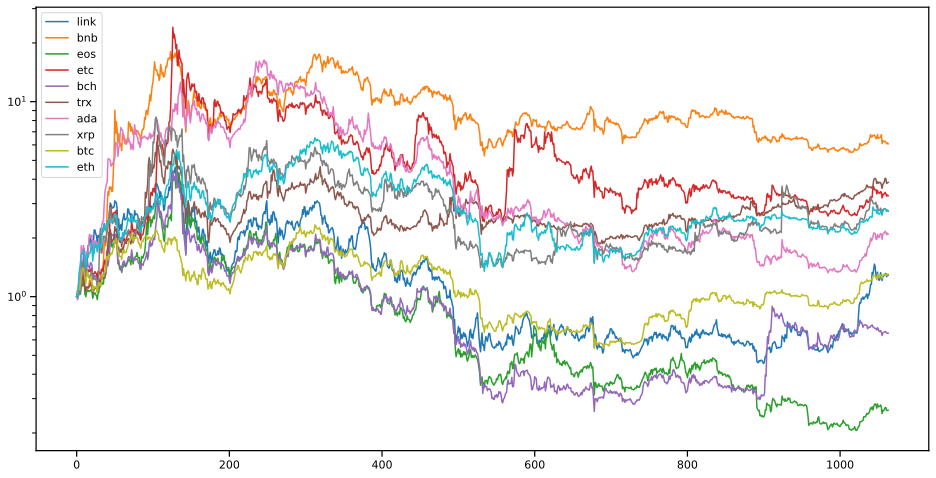

In [ ]:
# load data using tools module
# data = tools.dataset('nyse_o')

# plot first three of them as example
# data.iloc[:,:3].plot()
# print(data)
# import matplotlib.pyplot as plt
# plt.yscale("log")
# plt.plot(pricematrix)
pricematrix.plot(logy=True)
# result.iloc[:,].plot()

<Axes: >

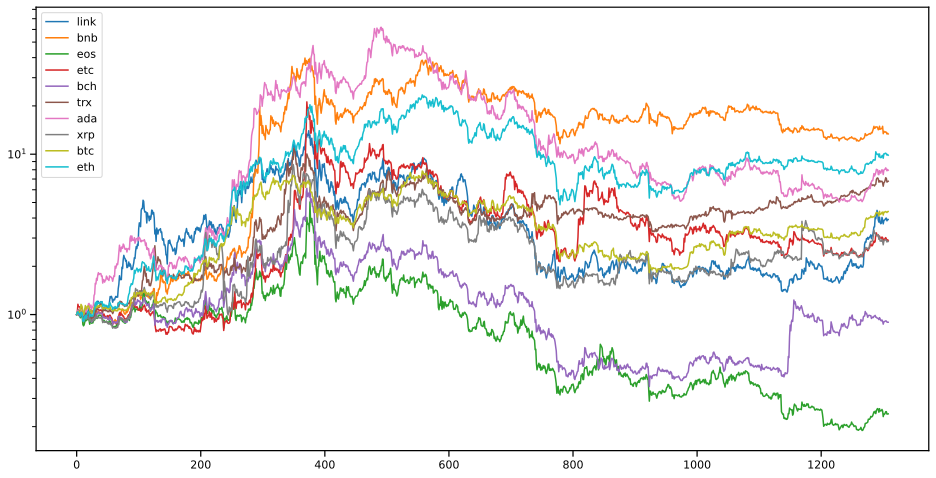

In [ ]:

pricematrix.plot(logy=True)

Now we need an implementation of the OLMAR algorithm. Fortunately, it is already implemented in module `algos`, so all we have to do is load it and set its parameters. Authors recommend lookback window $w = 5$ and threshold $\epsilon = 10$ (these are default parameters anyway). Just call `run` method on our data to get results for analysis.

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.83 ± 0.51
    Ulcer index: 1.03
    Information ratio (wrt benchmark): -0.21
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): -0.06 ± 0.44
    Beta / Alpha: 0.96 / -0.824%
    Annualized return: 52.82%
    Annualized volatility: 63.83%
    Longest drawdown: 932 days
    Max drawdown: 77.39%
    Winning days: 54.2%
    Annual turnover: 0.0
        
0       1.000000
1       1.026879
2       1.056990
3       1.031413
4       1.025938
          ...   
1304    5.476351
1305    5.423140
1306    5.286982
1307    5.349835
1308    5.316732
Length: 1309, dtype: float64


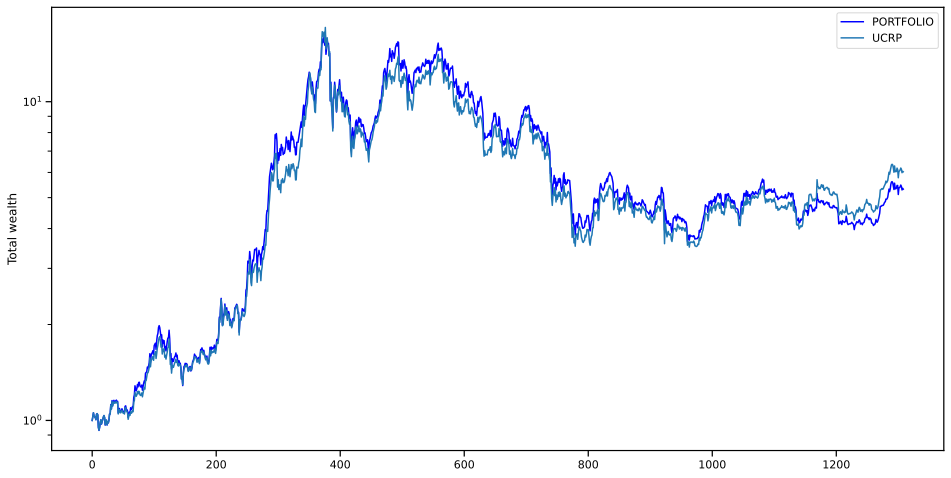

In [ ]:
# set algo parameters
algo = algos.BAH()

# run
# result = algo.run(data)
result = algo.run(pricematrix) 

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.86 ± 0.51
    Ulcer index: 1.03
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.86 ± 0.51
    Appraisal ratio (wrt benchmark): -0.00 ± 0.45
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 55.89%
    Annualized volatility: 64.83%
    Longest drawdown: 932 days
    Max drawdown: 79.53%
    Winning days: 55.0%
    Annual turnover: 4.4
        
0       1.000000
1       1.026879
2       1.056952
3       1.031484
4       1.025873
          ...   
1304    6.192477
1305    6.144486
1306    5.987704
1307    6.049095
1308    6.027340
Length: 1309, dtype: float64
0            NaN
1       0.026175
2       0.028453
3      -0.024691
4      -0.005470
          ...   
1304    0.014508
1305   -0.005874
1306   -0.027480
1307    0.010711
1308   -0.001858
Length: 1309, dtype: float64
0            NaN
1       0.026175
2       0.028453
3      -0.024691
4      -0.005470
          ...   
1304    0.012789
1305   -0.007810
1306   -

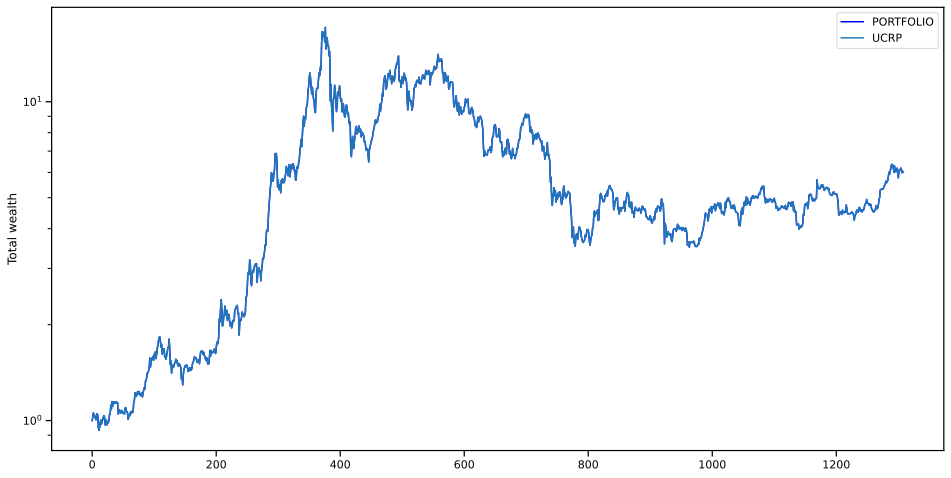

In [ ]:
# set algo parameters
algo = algos.CRP()

# run
# result = algo.run(data)
result = algo.run(pricematrix) 

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

In [ ]:
mlresults5
# mlresult5.loc[2, 'results'].plot(assets=False, logy=True, weights=False, ucrp=True);

NameError: name 'mlresults5' is not defined

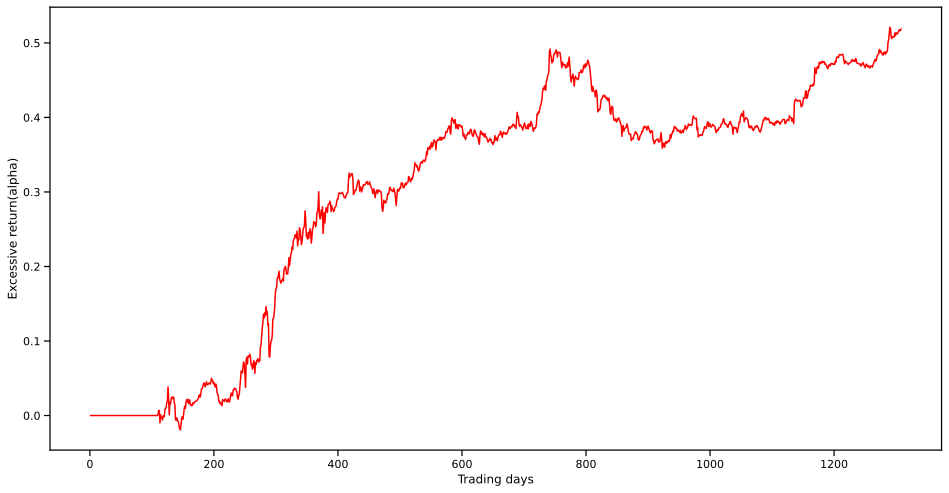

In [ ]:

mlreturn_  = (mlresult5.loc[2, 'results'].equity.diff() / mlresult5.loc[2, 'results'].equity)
resultreturn_ = (result.equity.diff() / result.equity)
alphareturn_ = mlreturn_ - resultreturn_
alphacumsum_ = np.cumsum(alphareturn_[1:, ])
plt.xlabel('Trading days')
plt.ylabel('Excessive return(alpha)')
plt.plot(alphacumsum_, 'r', label = 'alpha')
plt.savefig('alpha.png')

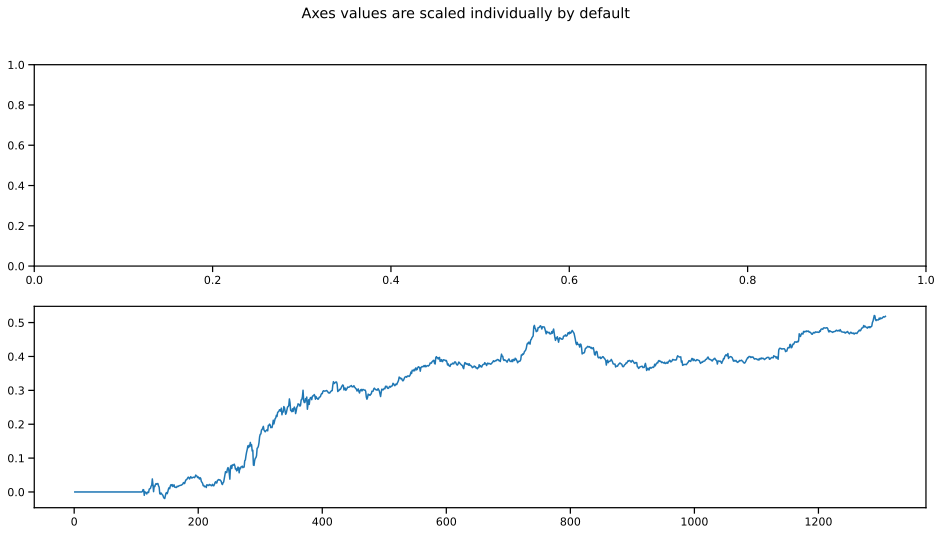

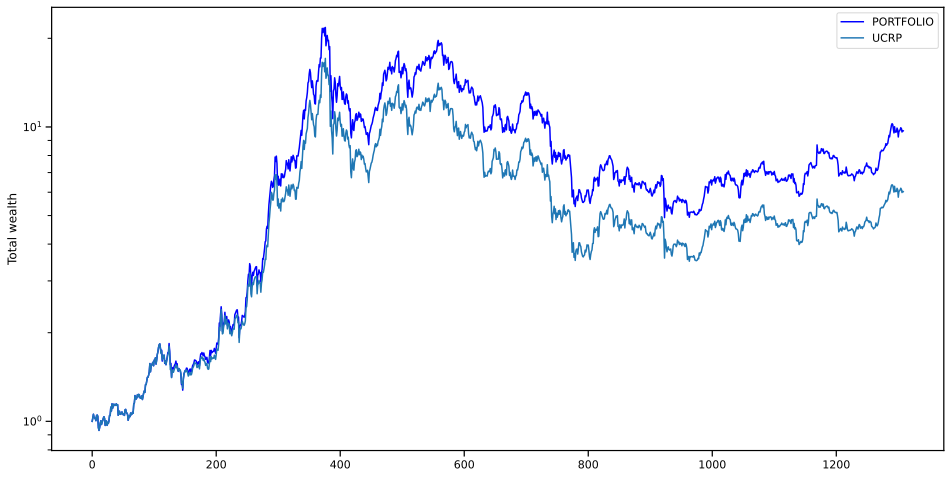

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax2.plot(alphacumsum_)

Summary:
    Profit factor: 1.13
    Sharpe ratio: 0.99 ± 0.59
    Ulcer index: 1.38
    Information ratio (wrt benchmark): 0.82
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): 0.82 ± 0.49
    Beta / Alpha: 1.00 / 25.532%
    Annualized return: 72.60%
    Annualized volatility: 73.28%
    Longest drawdown: 937 days
    Max drawdown: 74.04%
    Winning days: 53.5%
    Annual turnover: 3.6
        
0       1.000000
1       1.016408
2       1.022243
3       1.108214
4       1.105113
          ...   
1059    7.254327
1060    7.176673
1061    6.994410
1062    7.068504
1063    7.016570
Length: 1064, dtype: float64


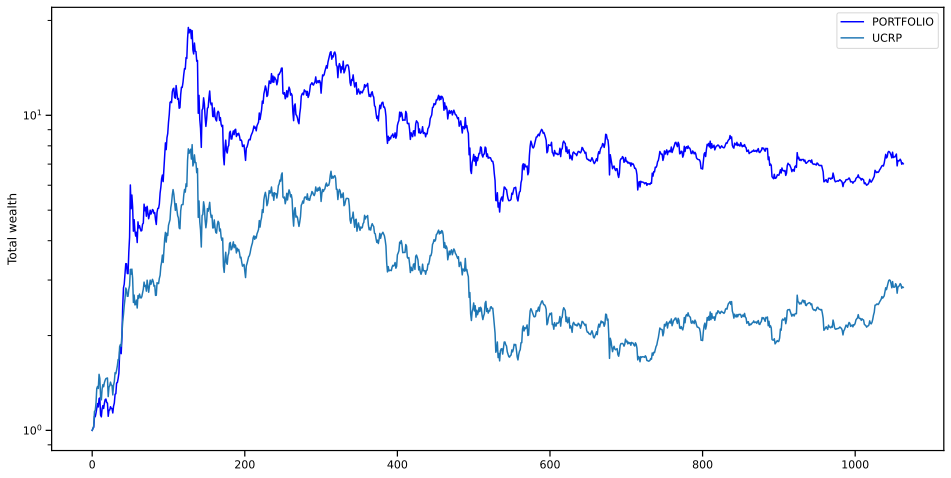

In [ ]:
# set algo parameters
algo = algos.BCRP()

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

In [ ]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.equity)

0       1.000000
1       1.012355
2       0.945983
3       0.970818
4       1.029704
          ...   
1059    0.192139
1060    0.190360
1061    0.186386
1062    0.187679
1063    0.188650
Length: 1064, dtype: float64


Ok, let's see some results. First print some basic summary metrics and plot portfolio equity with UCRP (uniform constant rebalanced portfolio).

In [ ]:
# set algo parameters
algo = algos.RMR(window=5, eps=10)

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.equity)

0       1.000000
1       1.012355
2       0.945983
3       0.970818
4       1.029704
          ...   
1059    0.205948
1060    0.204041
1061    0.199891
1062    0.202495
1063    0.203542
Length: 1064, dtype: float64


In [ ]:
# set algo parameters
algo = algos.PAMR()

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.equity)

/root/miniconda3/lib/python3.8/site-packages/universal/algos/pamr.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  lam = le / np.linalg.norm(x - x_mean) ** 2


0       1.000000
1       1.012355
2       1.026798
3       1.044230
4       1.085797
          ...   
1059    0.152321
1060    0.150870
1061    0.147183
1062    0.148204
1063    0.148178
Length: 1064, dtype: float64


Summary:
    Profit factor: 0.96
    Sharpe ratio: 0.22 ± 0.49
    Ulcer index: 0.25
    Information ratio (wrt benchmark): -0.49
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): -0.45 ± 0.49
    Beta / Alpha: 0.95 / -26.075%
    Annualized return: 18.73%
    Annualized volatility: 85.60%
    Longest drawdown: 940 days
    Max drawdown: 87.53%
    Winning days: 51.0%
    Annual turnover: 17.0
        
0       1.000000
1       1.053493
2       0.984424
3       1.010268
4       1.071546
          ...   
1059    0.525144
1060    0.520282
1061    0.509421
1062    0.514579
1063    0.509353
Length: 1064, dtype: float64


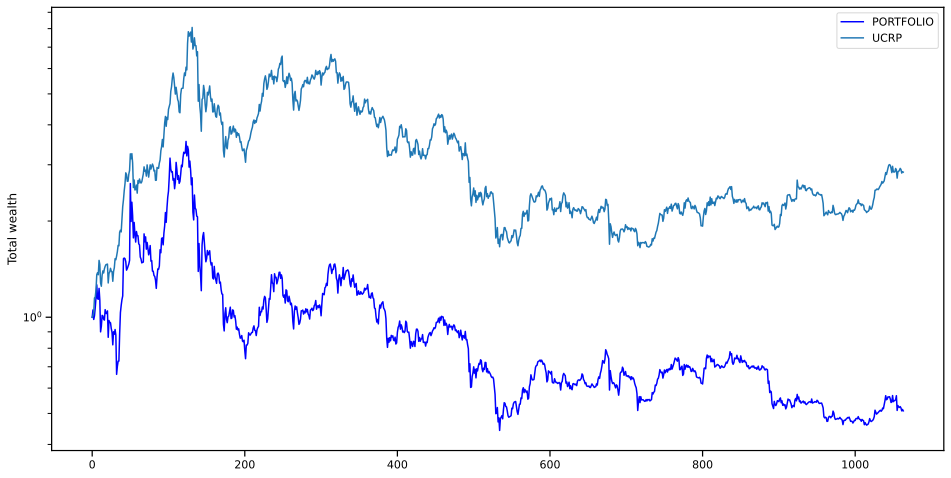

In [ ]:
# set algo parameters
algo = algos.BestSoFar()

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.14
    Sharpe ratio: 1.00 ± 0.60
    Ulcer index: 1.35
    Information ratio (wrt benchmark): 0.84
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): 0.93 ± 0.49
    Beta / Alpha: 0.95 / 23.090%
    Annualized return: 68.04%
    Annualized volatility: 68.03%
    Longest drawdown: 937 days
    Max drawdown: 69.73%
    Winning days: 54.4%
    Annual turnover: 4.0
        
0       1.000000
1       1.016201
2       1.020235
3       1.103667
4       1.111712
          ...   
1059    6.902698
1060    6.834355
1061    6.611289
1062    6.674889
1063    6.650474
Length: 1064, dtype: float64


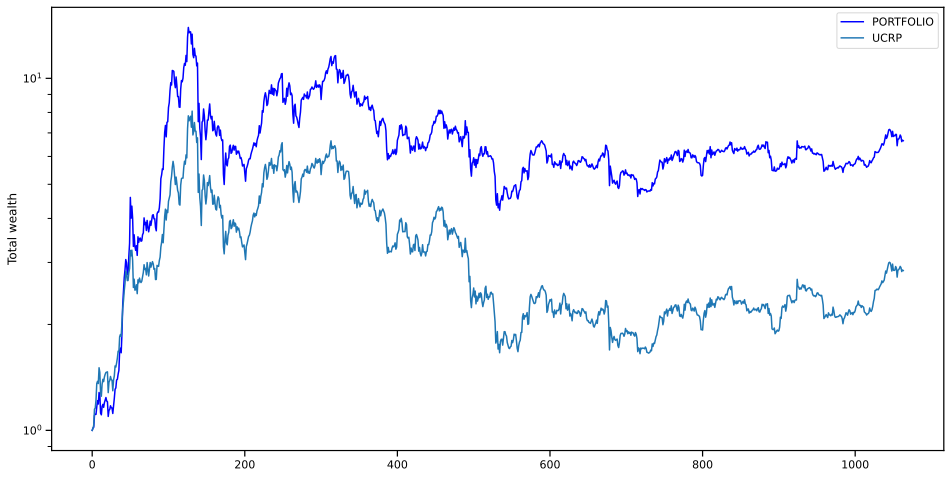

In [ ]:

# set algo parameters
algo = algos.BestMarkowitz()

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

In [ ]:
# set algo parameters
algo = algos.RPRT()

# run
# result = algo.run(data)
result = algo.run(pricematrix)
print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

AttributeError: module 'universal.algos' has no attribute 'RPRT'

Summary:
    Profit factor: 0.91
    Sharpe ratio: -0.03 ± 0.49
    Ulcer index: -0.04
    Information ratio (wrt benchmark): -1.03
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): -1.10 ± 0.49
    Beta / Alpha: 1.06 / -52.931%
    Annualized return: -2.90%
    Annualized volatility: 85.45%
    Longest drawdown: 958 days
    Max drawdown: 96.64%
    Winning days: 51.1%
    Annual turnover: 282.9
        


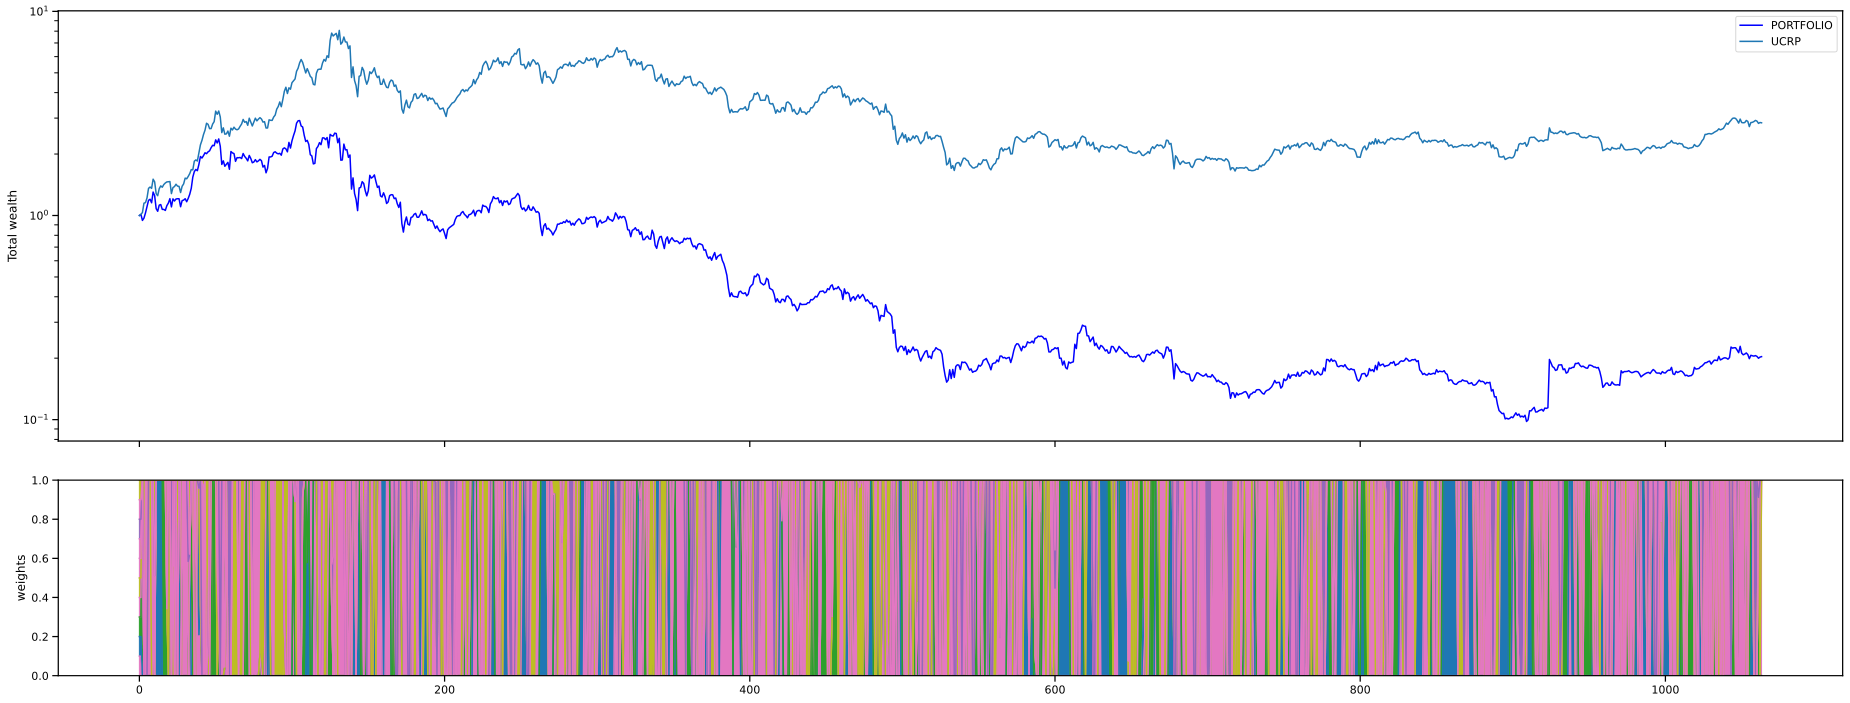

In [ ]:
print(result.summary())
result.plot(weights=True, assets=False, ucrp=True, logy=True);

That seems really impressive, in fact it looks too good to be true. Let's see how individual stocks contribute to portfolio equity and disable legend to keep the graph clean.

<Axes: >

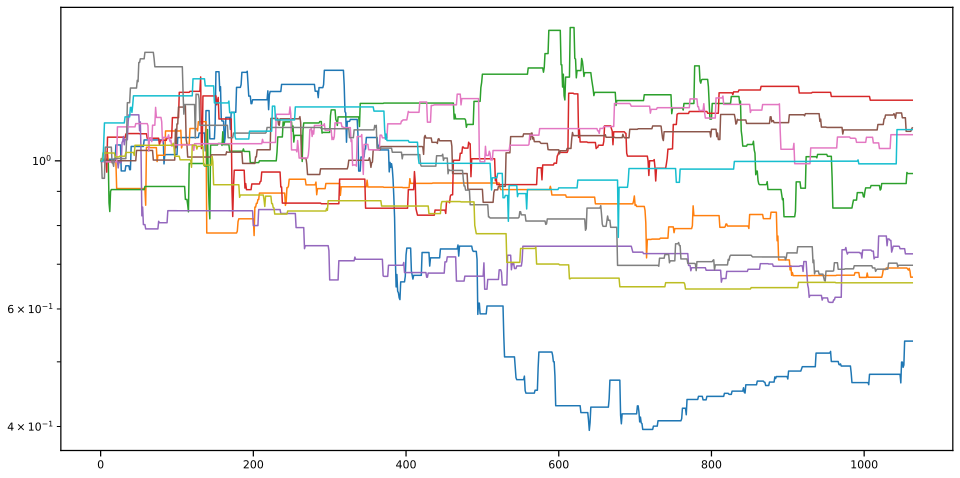

In [ ]:
result.plot_decomposition(legend=False, logy=True)

As you can see, almost all wealth comes from single stock (don't forget it has logarithm scale!). So if we used just 5 of all these stocks, we would get almost the same equity as if we used all of them. To stress test the strategy, we can remove that stock and rerun the algorithm.

In [ ]:
pricematrix.iloc[-1:, :]
pricematrix.iloc[-10:, :] 


link       bnb       eos       etc       bch       trx       ada  \
1054  1.283131  6.775659  0.272218  3.426211  0.658645  3.760357  2.084791   
1055  1.210164  6.095824  0.251417  3.210598  0.631784  3.588476  1.969488   
1056  1.264764  6.313262  0.261193  3.348916  0.652120  3.772993  2.088850   
1057  1.278828  6.250890  0.259781  3.332949  0.655521  3.804841  2.120809   
1058  1.284795  6.227140  0.263603  3.385039  0.659681  3.899408  2.121098   
1059  1.309055  6.264005  0.269669  3.424333  0.662027  4.050485  2.167169   
1060  1.313877  6.206006  0.269899  3.369105  0.660264  4.017721  2.130338   
1061  1.264200  6.076458  0.260787  3.275711  0.650645  3.807462  2.078279   
1062  1.289114  6.137987  0.260891  3.318371  0.649235  3.833876  2.117052   
1063  1.287630  6.075648  0.261443  3.295740  0.649121  3.853711  2.094479   

           xrp       btc       eth  
1054  2.776013  1.291736  2.738074  
1055  2.630702  1.239227  2.627133  
1056  2.773824  1.290893  2.797040  
1057  2.812818  1.284983  2.792069  
1058  2.820327  1.300337  2.817227  
1059  2.826031  1.302781  2.823421  
1060  2.797071  1.291823  2.794512  
1061  2.739162  1.283496  2.748381  
1062  2.771748  1.302518  2.773475  
1063  2.762130  1.302798  2.742880

In [ ]:
print(pricematrix.iloc[:2, ])
returnmatrix = pricematrix.diff(axis = 0, periods = 1) / pricematrix

       link       bnb       eos       etc       bch       trx      ada  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.00000   
1  1.053493  1.013705  1.013108  1.004505  0.993378  1.003935  0.96489   

        xrp      btc       eth  
0  1.000000  1.00000  1.000000  
1  1.076643  1.01136  0.988533  


In [ ]:
print(returnmatrix)
returnmatrix.rank(1)

          link       bnb       eos       etc       bch       trx       ada  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1     0.050777  0.013520  0.012939  0.004484 -0.006666  0.003920 -0.036388   
2     0.029489  0.011312 -0.002408  0.015936  0.038237  0.012982  0.014066   
3     0.105083  0.066540  0.060918  0.126691  0.154205  0.082928  0.130963   
4    -0.025318 -0.027799 -0.014508  0.032706 -0.055477  0.025897  0.063280   
...        ...       ...       ...       ...       ...       ...       ...   
1059  0.018533  0.005885  0.022497  0.011475  0.003544  0.037298  0.021259   
1060  0.003670 -0.009346  0.000850 -0.016392 -0.002671 -0.008155 -0.017289   
1061 -0.039295 -0.021320 -0.034940 -0.028511 -0.014784 -0.055223 -0.025049   
1062  0.019326  0.010024  0.000400  0.012855 -0.002172  0.006890  0.018315   
1063 -0.001152 -0.010260  0.002110 -0.006867 -0.000176  0.005147 -0.010778   

           xrp       btc       eth  
0          NaN       NaN  

link  bnb  eos  etc  bch   trx   ada   xrp   btc   eth
0      NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN
1      9.0  8.0  7.0  5.0  3.0   4.0   1.0  10.0   6.0   2.0
2      7.0  3.0  2.0  6.0  8.0   4.0   5.0   1.0  10.0   9.0
3      6.0  4.0  3.0  7.0  9.0   5.0   8.0   1.0   2.0  10.0
4      4.0  3.0  5.0  7.0  1.0   6.0  10.0   8.0   2.0   9.0
...    ...  ...  ...  ...  ...   ...   ...   ...   ...   ...
1059   7.0  5.0  9.0  6.0  4.0  10.0   8.0   2.0   1.0   3.0
1060  10.0  5.0  9.0  2.0  8.0   7.0   1.0   3.0   6.0   4.0
1061   2.0  6.0  3.0  4.0  9.0   1.0   5.0   7.0  10.0   8.0
1062  10.0  5.0  2.0  7.0  1.0   3.0   9.0   6.0   8.0   4.0
1063   6.0  3.0  9.0  4.0  7.0  10.0   2.0   5.0   8.0   1.0

[1064 rows x 10 columns]

In [ ]:
returnmatrix.iloc[1050:1064, :]

link       bnb       eos       etc       bch       trx       ada  \
1050 -0.080220 -0.044494 -0.034388 -0.028414 -0.016922 -0.016685 -0.022791   
1051 -0.018323  0.005891  0.004843  0.000595 -0.023516  0.011544 -0.013110   
1052  0.007903  0.002233  0.000410 -0.005797 -0.006291 -0.006296  0.031487   
1053  0.079219  0.005707  0.017183  0.019655  0.012530  0.004025  0.016578   
1054 -0.034273  0.028177 -0.022571 -0.008611 -0.017877 -0.024309 -0.011581   
1055 -0.060296 -0.111525 -0.082734 -0.067157 -0.042515 -0.047898 -0.058545   
1056  0.043170  0.034441  0.037429  0.041302  0.031184  0.048905  0.057142   
1057  0.010998 -0.009978 -0.005437 -0.004791  0.005189  0.008370  0.015069   
1058  0.004644 -0.003814  0.014499  0.015388  0.006307  0.024252  0.000136   
1059  0.018533  0.005885  0.022497  0.011475  0.003544  0.037298  0.021259   
1060  0.003670 -0.009346  0.000850 -0.016392 -0.002671 -0.008155 -0.017289   
1061 -0.039295 -0.021320 -0.034940 -0.028511 -0.014784 -0.055223 -0.025049   
1062  0.019326  0.010024  0.000400  0.012855 -0.002172  0.006890  0.018315   
1063 -0.001152 -0.010260  0.002110 -0.006867 -0.000176  0.005147 -0.010778   

           xrp       btc       eth  
1050 -0.061345 -0.047019 -0.050652  
1051  0.000633  0.008931 -0.002927  
1052 -0.003382  0.001493  0.003115  
1053  0.026046  0.022228  0.024114  
1054 -0.024149  0.002009  0.005568  
1055 -0.055237 -0.042372 -0.042229  
1056  0.051598  0.040023  0.060745  
1057  0.013863 -0.004599 -0.001781  
1058  0.002663  0.011808  0.008930  
1059  0.002018  0.001876  0.002194  
1060 -0.010354 -0.008482 -0.010345  
1061 -0.021141 -0.006488 -0.016785  
1062  0.011756  0.014604  0.009048  
1063 -0.003482  0.000215 -0.011154

In [ ]:
np.array(returnmatrix.iloc[-10:-5, 0].mean() / returnmatrix.iloc[-10:-5, 0].std())


array(-0.17657767)

In [ ]:
a = np.array([.1,.2,.01,-.2,.5,.7])
pd.Series(a).rank()

0    3.0
1    4.0
2    2.0
3    1.0
4    5.0
5    6.0
dtype: float64

Summary:
    Profit factor: 1.06
    Sharpe ratio: 0.66 ± 0.54
    Ulcer index: 0.70
    Information ratio (wrt benchmark): -0.31
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): -0.18 ± 0.49
    Beta / Alpha: 0.96 / -2.340%
    Annualized return: 43.23%
    Annualized volatility: 65.48%
    Longest drawdown: 932 days
    Max drawdown: 82.34%
    Winning days: 54.0%
    Annual turnover: 103.8
        
0       1.000000
1       1.012355
2       1.034439
3       1.149131
4       1.156554
          ...   
1059    2.562062
1060    2.545387
1061    2.457572
1062    2.489802
1063    2.482017
Length: 1064, dtype: float64


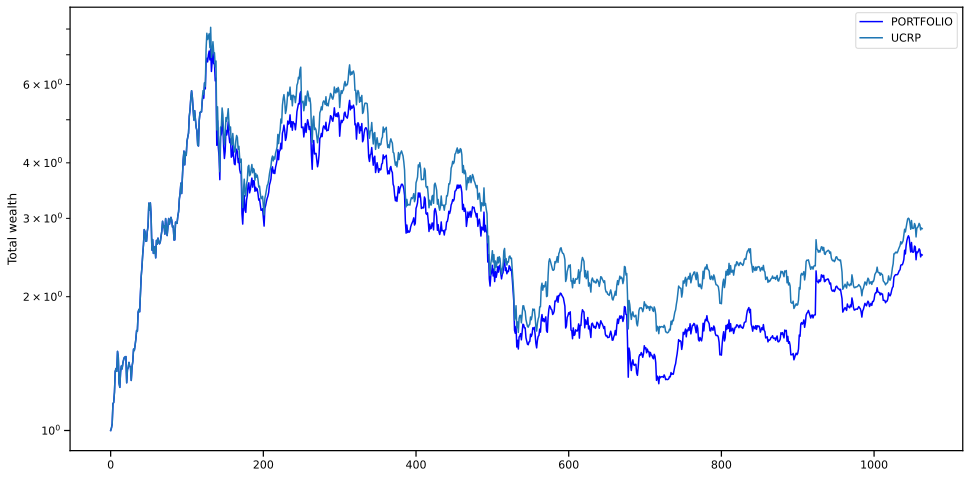

In [ ]:
from universal.algo import Algo
import numpy as np
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import svm
from sklearn.linear_model import LogisticRegression


class ML(Algo):
    # use logarithm of prices
    PRICE_TYPE = 'log'
    
    def __init__(self, n, model='mlp'):
        # length of moving average
        self.n = n
        self.lookbackwindow = 10
        self.featurewindow = 100
        self.updateFrequency = 20
        self.regr = None
        self.model = model
        # step function will be called after min_history days
        super().__init__(min_history=n)
    
    def init_weights(self, cols):
        # use zero weights for start
        m = len(cols)
        return np.ones(m) / m
    
    def step(self, x, last_b, history):
        # calculate moving average
        nrow = history.shape[0]
        ncol = history.shape[1]
        if history.shape[0] % self.updateFrequency == 0:
            featureMatrix = pd.DataFrame()
            targetMatrix = pd.DataFrame()
            for colidx in range(ncol):
                relativeposition = []
                rankcorrelation = []
                volatility = []
                previousincrease = []
                for i in range(nrow-self.featurewindow, nrow-2):
                    relativeposition.append(np.array(history.iloc[(i-self.lookbackwindow):(i+1),colidx].mean() / history.iloc[(i-self.lookbackwindow):(i+1),colidx].std()) )
                    coef, p = spearmanr(history.iloc[(i-self.lookbackwindow+1):(i+1), colidx],
                                        np.array(range(len(history.iloc[(i-self.lookbackwindow+1):(i+1), colidx]))))
                    rankcorrelation.append(coef)
                    volatility.append(history.iloc[(i-self.lookbackwindow):(i+1),colidx].std())
                    previousincrease.append(history.iloc[-1, colidx])
                
                featureMatrix[str(colidx) + 'relative'] = np.array(relativeposition)
                featureMatrix[str(colidx) + 'rank'] = np.array(rankcorrelation)
                featureMatrix[str(colidx) + 'vol'] = np.array(volatility)
                featureMatrix[str(colidx) + 'preincrease'] = np.array(previousincrease)
            targetMatrix = history.iloc[(nrow-self.featurewindow+2):nrow]
            targetMatrix = targetMatrix.rank(1)
            # print(featureMatrix.shape)
            # print(targetMatrix.shape)
            if self.model == 'mlp':
                self.regr = MLPRegressor(random_state=10, max_iter=10000,
                                    #early_stopping=True,
                                    hidden_layer_sizes=(30, 20,)
                                    ).fit(featureMatrix, targetMatrix)
            if self.model == 'xgb':
                self.regr = MultiOutputRegressor(XGBRegressor(objective='reg:linear',
                                    n_estimators=1000, seed=3)).fit(featureMatrix, targetMatrix)
            if self.model == 'rf':
                    self.regr = RandomForestRegressor(n_estimators=200,
                                                 random_state=0).fit(featureMatrix, targetMatrix)
            if self.model == 'knn':
                self.regr = KNeighborsRegressor(n_neighbors=15,).fit(featureMatrix, targetMatrix)
        
        if self.regr is not None:
            featureMatrix = pd.DataFrame() 
            for colidx in range(ncol):
                relativeposition = []
                rankcorrelation = []
                volatility = []
                previousincrease = []
                i = nrow - 1
                relativeposition.append(np.array(history.iloc[(i-self.lookbackwindow):(i+1),colidx].mean() / history.iloc[(i-self.lookbackwindow):(i+1),colidx].std()) )
                coef, p = spearmanr(history.iloc[(i-self.lookbackwindow+1):(i+1), colidx],
                                    np.array(range(len(history.iloc[(i-self.lookbackwindow+1):(i+1), colidx]))))
                rankcorrelation.append(coef)
                volatility.append(history.iloc[(i-self.lookbackwindow):(i+1),colidx].std())
                previousincrease.append(history.iloc[-1, colidx])

                featureMatrix[str(colidx) + 'relative'] = np.array(relativeposition)
                featureMatrix[str(colidx) + 'rank'] = np.array(rankcorrelation)
                featureMatrix[str(colidx) + 'vol'] = np.array(volatility)
                featureMatrix[str(colidx) + 'preincrease'] = np.array(previousincrease)
            w = self.regr.predict(featureMatrix)[0]
            w = pow( pd.Series(w).rank(), 2)
            # print(nrow, w)
        else:

            # weights
            # delta = x - ma
            w = 0*x+1
            # w = np.array(w)
        
        # normalize so that they sum to 1
        
        return w / sum(w)
mr = ML(n=100)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);


Summary:
    Profit factor: 1.07
    Sharpe ratio: 0.66 ± 0.54
    Ulcer index: 0.71
    Information ratio (wrt benchmark): -0.10
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): 0.10 ± 0.49
    Beta / Alpha: 0.85 / 3.511%
    Annualized return: 43.64%
    Annualized volatility: 66.18%
    Longest drawdown: 932 days
    Max drawdown: 82.12%
    Winning days: 54.6%
    Annual turnover: 201.9
        
0       1.000000
1       1.012355
2       1.034439
3       1.149131
4       1.156554
          ...   
1059    2.545646
1060    2.521558
1061    2.456973
1062    2.483298
1063    2.483298
Length: 1064, dtype: float64


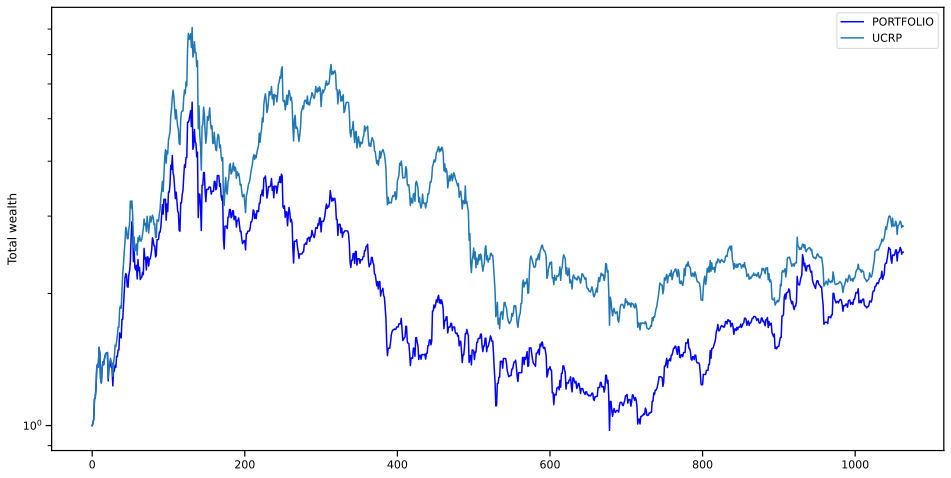

In [ ]:
from universal.algo import Algo
import numpy as np

class MeanReversion(Algo):
    # use logarithm of prices
    PRICE_TYPE = 'log'
    
    def __init__(self, n):
        # length of moving average
        self.n = n
        # step function will be called after min_history days
        super().__init__(min_history=n)
    
    def init_weights(self, cols):
        # use zero weights for start
        m = len(cols)
        return np.ones(m) / m
    
    def step(self, x, last_b, history):
        # calculate moving average
        ma = history.iloc[-self.n:].mean()
        
        # print('x:\t', x)
        # print('history:\t', history)
        
        # weights
        delta = x - ma
        w = np.maximum(-delta, 0.)
        
        # normalize so that they sum to 1
        return w / sum(w)
mr = MeanReversion(n=20)
result = mr.run(pricematrix)

print(result.summary())
print(result.equity)
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.77 ± 0.55
    Ulcer index: 0.73
    Information ratio (wrt benchmark): -0.45
    Benchmark sharpe: 0.71 ± 0.54
    Appraisal ratio (wrt benchmark): 0.38 ± 0.49
    Beta / Alpha: 0.34 / 8.729%
    Annualized return: 24.94%
    Annualized volatility: 32.20%
    Longest drawdown: 937 days
    Max drawdown: 52.07%
    Winning days: 49.9%
    Annual turnover: 21.1
        


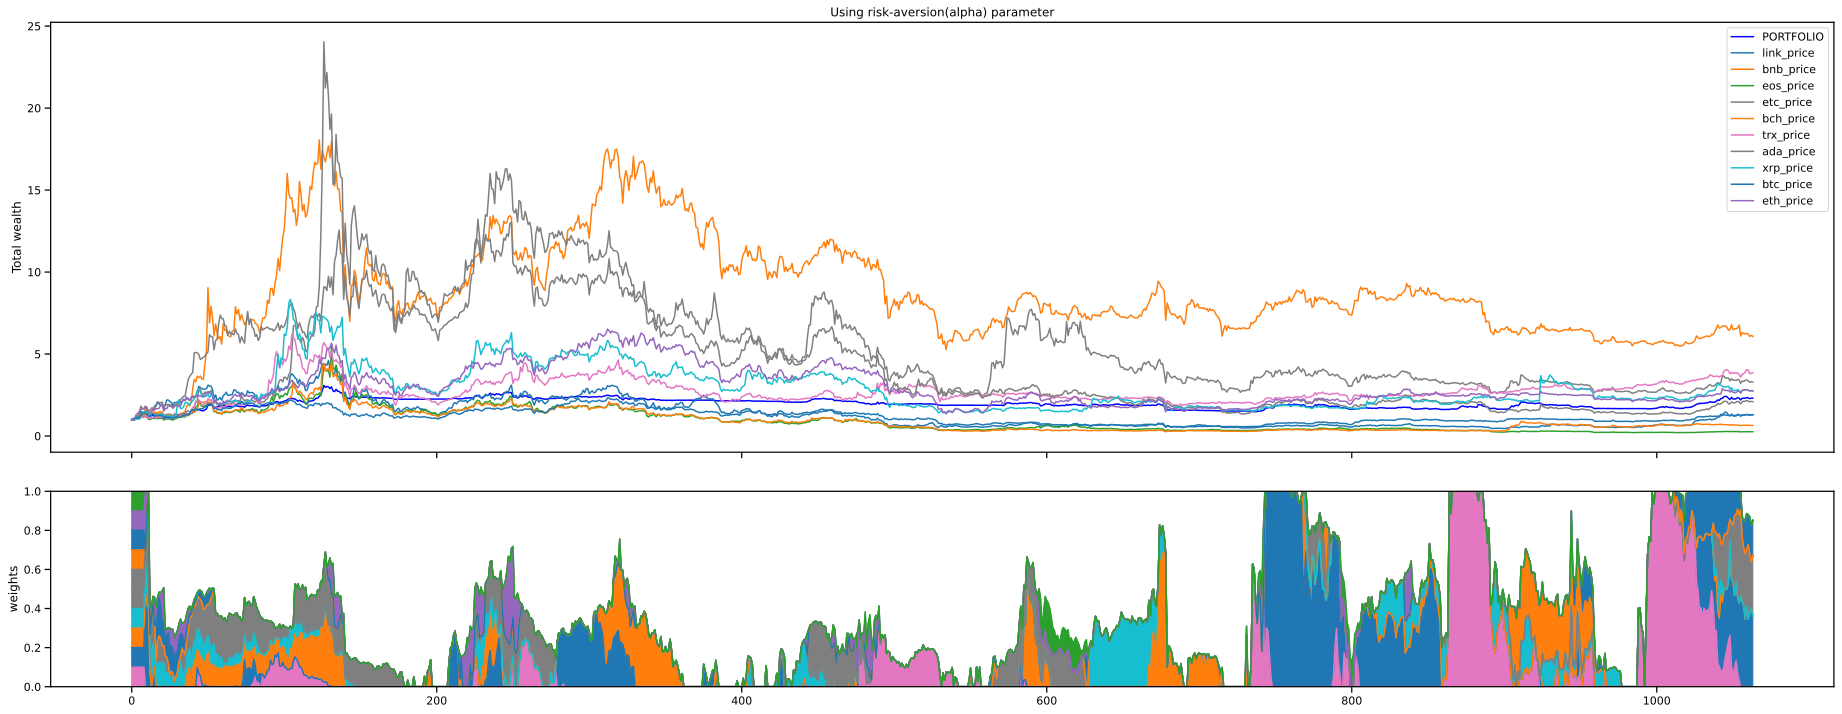

In [ ]:
algo = DynamicCRP(n=52, min_history=8, metric='sharpe', alpha=0.01)
result = algo.run(pricematrix)
print(result.summary())
result.plot(title='Using risk-aversion(alpha) parameter');

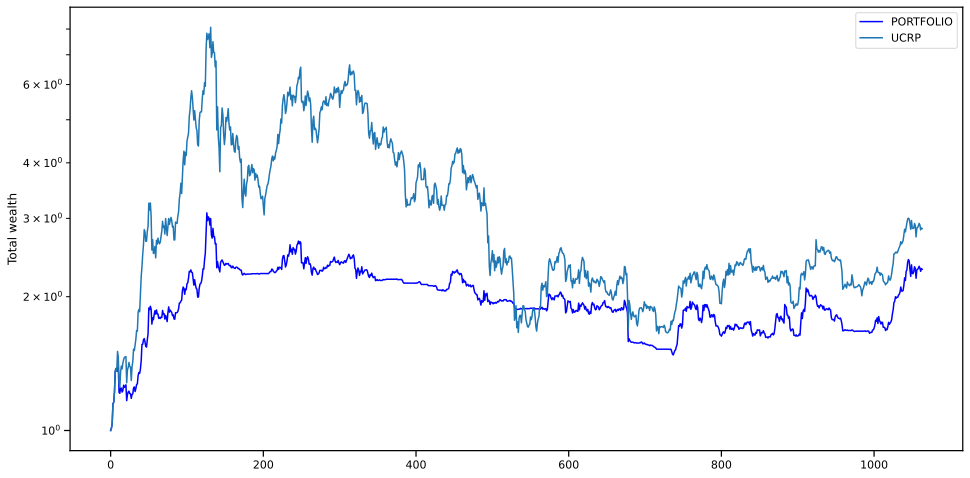

In [ ]:
result.plot(weights=False, assets=False, ucrp=True, logy=True);

Summary:
    Profit factor: 1.55
    Sharpe ratio: 2.48 ± 0.43
    Ulcer index: 12.70
    Information ratio (wrt benchmark): 2.36
    Benchmark sharpe: 1.12 ± 0.27
    Appraisal ratio (wrt benchmark): 2.21 ± 0.21
    Beta / Alpha: 1.48 / 97.131%
    Annualized return: 119.24%
    Annualized volatility: 48.01%
    Longest drawdown: 202 days
    Max drawdown: 45.91%
    Winning days: 56.5%
    Annual turnover: 338.3
        


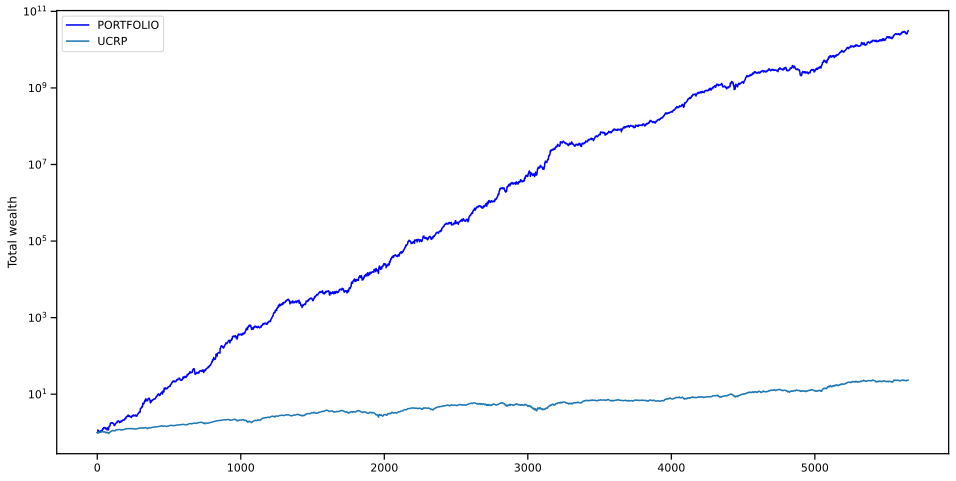

In [ ]:
# find name of the most profitable asset
most_profitable = result.equity_decomposed.iloc[-1].idxmax()

# rerun an algorithm on data without it
result_without = algo.run(data.drop(columns=[most_profitable]))

# and print results
print(result_without.summary())
result_without.plot(weights=False, assets=False, ucrp=True, logy=True);

Summary:
    Profit factor: 1.35
    Sharpe ratio: 1.78 ± 0.34
    Ulcer index: 6.79
    Information ratio (wrt benchmark): 1.59
    Benchmark sharpe: 1.12 ± 0.27
    Appraisal ratio (wrt benchmark): 1.44 ± 0.21
    Beta / Alpha: 1.48 / 63.323%
    Annualized return: 85.41%
    Annualized volatility: 48.08%
    Longest drawdown: 382 days
    Max drawdown: 50.21%
    Winning days: 50.4%
    Annual turnover: 338.3
        


[<Axes: ylabel='Total wealth'>]

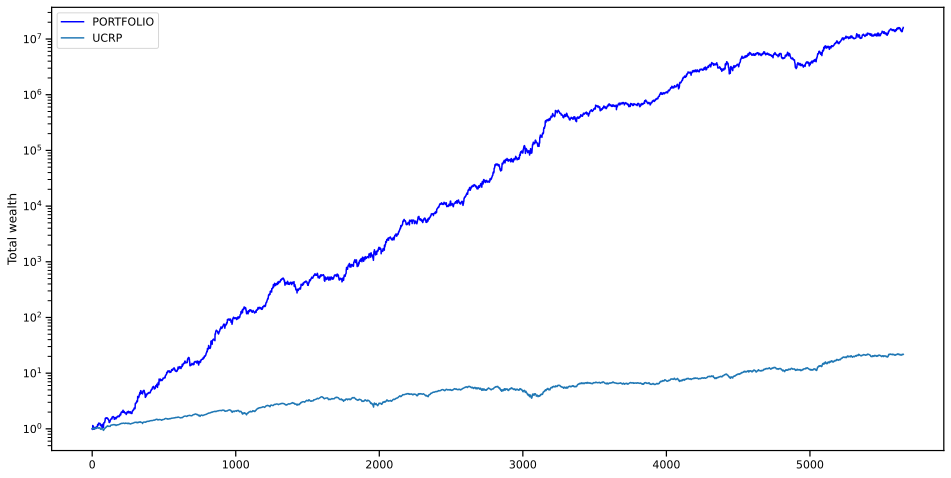

In [ ]:
result_without.fee = 0.001
print(result_without.summary())
result_without.plot(weights=False, assets=False, ucrp=True, logy=True)

# Testing Yahoo data

Let's see whether the algo works on recent data, too. First download closing prices of several (randomly chosen) stocks from Yahoo.

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# load data from Yahoo
yahoo_data_raw = pdr.get_data_yahoo(['MSFT', 'IBM', 'AAPL', 'GOOG'], start=dt.datetime(2005,1,1))
yahoo_data = yahoo_data_raw['Adj Close']

# plot normalized prices of these stocks
(yahoo_data / yahoo_data.iloc[0,:]).plot()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


ERROR:yfinance:Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)
[                       0%%                      ]ERROR:yfinance:Failed to get ticker 'GOOG' reason: Expecting value: line 1 column 1 (char 0)
[**********************50%%                      ]  2 of 4 completedERROR:yfinance:Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
[**********************75%%**********            ]  3 of 4 completedERROR:yfinance:Failed to get ticker 'IBM' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  4 of 4 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['MSFT', 'GOOG', 'AAPL', 'IBM']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


IndexError: single positional indexer is out-of-bounds

Instead of using fixed parameters, we will test several `window` parameters with function `run_combination`. It the same as `run`, just use it as classmethod and use lists for combination of values. `run_combination` returns list of results which can be used similarly to `result`.

In [ ]:
list_result = algos.OLMAR.run_combination(yahoo_data, window=[3,5,10,15], eps=10)
print(list_result.summary())
list_result.plot()

Since we don't know the best parameters in hindsight, we will invest equal money in each of them in the beginning and let them run. This is called _buy and hold_ strategy. Portfolio equities in `list_result` can be regarded as stock prices and used as an input for new algo (_buy and hold_ in this case). This way you can chain algorithms however you like, for example OLMAR on OLMAR, etc.

To compare it with individual assets or uniform constant rebalanced portfolio, use parameters `assets` and `ucrp`.

In [ ]:
# run buy and hold on OLMAR results and show its equity together with original assets
algos.BAH().run(list_result).plot(assets=True, weights=False, ucrp=True);

Ok, so that was enough for the start. There are plenty of other algorithms in module `algos` collected across research papers about online-portfolios including famous [Universal portfolio](http://en.wikipedia.org/wiki/Universal_portfolio_algorithm) by Thomas Cover.

# How to write your own algorithm

Entire package is actually pretty simple. Algorithms are subclasses of base `Algo` class and methods for reporting, plotting and analysing are built on top of this class. I will illustrate it on this mean-reversion strategy

1. use logarithm of price
2. calculate difference $\delta_i$ between current price of $i$-th stock and its moving average of $n$ days
3. if $\delta_i > 0$, assign zero portfolio weight $w_i = 0$ for $i$-th stock
4. if $\delta_i < 0$, assign weight $w_i = -\delta_i$ for $i$-th stock
5. normalize all weights so that $\sum w_i = 1$

The idea is that badly performing stocks will revert to its mean and have higher returns than those above their mean. Here is the complete code, comments should be self-explanatory.

In [ ]:
from universal.algo import Algo
import numpy as np

class MeanReversion(Algo):
    # use logarithm of prices
    PRICE_TYPE = 'log'
    
    def __init__(self, n):
        # length of moving average
        self.n = n
        # step function will be called after min_history days
        super().__init__(min_history=n)
    
    def init_weights(self, cols):
        # use zero weights for start
        return pd.Series(np.zeros(len(cols)), cols)
    
    def step(self, x, last_b, history):
        # calculate moving average
        ma = history.iloc[-self.n:].mean()
        
        # weights
        delta = x - ma
        w = np.maximum(-delta, 0.)
        
        # normalize so that they sum to 1
        return w / sum(w)

That's all. Now let's try it on nyse data.

In [ ]:
mr = MeanReversion(n=20)
result = mr.run(data)

print(result.summary())
result.plot(assets=False, logy=True, weights=False, ucrp=True);

Not bad considering how simple that strategy is. Next step could be performance optimization. To profile your strategy, you can use function `profile` in `universal.tools` which profile the code using fantastic [line_profiler](http://pythonhosted.org/line_profiler/). After identifying the most critical parts of the code, you have two options. Either optimize your `step` function (using tools such as [weave](http://docs.scipy.org/doc/scipy/reference/tutorial/weave.html), [numba](http://numba.pydata.org/), [theano](http://deeplearning.net/software/theano/) or [cython](http://cython.org/)) or subclass `weights` method if your code could be vectorized easily (beware the forward bias!). 